#### Step 1: Reading and Understanding the Data

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler

# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [2]:
# read data
Telecom_churn = pd.read_csv('telecom_churn_data.csv')

In [3]:
# look at initial rows of the data
Telecom_churn.head(10)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,

In [4]:
# Inspect the shape of the dataset
Telecom_churn.shape

(99999, 226)

Based on above inspection, we can see that there are 226 columns & 1lakh rows approx

In churn prediction, we assume that there are 3 phases of customer lifecycle :
- The 'good' phase [Month 6 & 7]
- The 'action' phase [Month 8]
- The 'churn' phase [Month 9]


In [5]:
# look at data statistics
Telecom_churn.describe(include='all')

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999,99398,98899,98340,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000

In [6]:
# look at missing value ratio in each column
Telecom_churn.isnull().sum()*100/Telecom_churn.shape[0]

mobile_number                0.000000
circle_id                    0.000000
loc_og_t2o_mou               1.018010
std_og_t2o_mou               1.018010
loc_ic_t2o_mou               1.018010
last_date_of_month_6         0.000000
last_date_of_month_7         0.601006
last_date_of_month_8         1.100011
last_date_of_month_9         1.659017
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
arpu_9                       0.000000
onnet_mou_6                  3.937039
onnet_mou_7                  3.859039
onnet_mou_8                  5.378054
onnet_mou_9                  7.745077
offnet_mou_6                 3.937039
offnet_mou_7                 3.859039
offnet_mou_8                 5.378054
offnet_mou_9                 7.745077
roam_ic_mou_6                3.937039
roam_ic_mou_7                3.859039
roam_ic_mou_8                5.378054
roam_ic_mou_9                7.745077
roam_og_mou_6                3.937039
roam_og_mou_

#### Step 2: Data Cleaning & Handling Missing

#### impute missing values

i) Impute with zeroes

In [7]:
# some recharge columns have minimum value of 1 while some don't
recharge_cols=['total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9',
              'count_rech_2g_6','count_rech_2g_7','count_rech_2g_8','count_rech_2g_9',
              'count_rech_3g_6','count_rech_3g_7','count_rech_3g_8','count_rech_3g_9',
              'max_rech_data_6','max_rech_data_7','max_rech_data_8','max_rech_data_9',
              'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9']
Telecom_churn[recharge_cols].describe(include='all')

,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.00000,25153.000000,25571.000000,26339.000000,25922.000000
mean,2.463802,2.666419,2.651999,2.441170,1.864668,2.044699,2.016288,1.781807,0.599133,0.621720,0.635711,0.659363,126.393392,126.729459,125.717301,124.94144,192.600982,200.981292,197.526489,192.734315
std,2.789128,3.031593,3.074987,2.516339,2.570254,2.768332,2.720132,2.214701,1.274428,1.394524,1.422827,1.411513,108.477235,109.765267,109.437851,111.36376,192.646318,196.791224,191.301305,188.400286
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.500000,0.500000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,25.000000,25.000000,25.000000,25.00000,82.000000,92.000000,87.000000,69.000000
50%,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,145.000000,145.000000,145.000000,145.00000,154.000000,154.000000,154.000000,164.000000
75%,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,177.000000,177.000000,179.000000,179.00000,252.000000,252.000000,252.000000,252.000000
max,61.000000,54.000000,60.000000,84.000000,42.000000,48.000000,44.000000,40.000000,29.000000,35.000000,45.000000,49.000000,1555.000000,1555.000000,1555.000000,1555.00000,7546.000000,4365.000000,4076.000000,4061.000000


In [8]:
# It is also observed that recharge date & the recharge value are missing together which means the customer didnt recharge

Telecom_churn.loc[Telecom_churn.total_rech_data_6.isnull() & Telecom_churn.date_of_last_rech_data_6.isnull(),["total_rech_data_6","date_of_last_rech_data_6"]].head(5)

,total_rech_data_6,date_of_last_rech_data_6
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
5,NaN,NaN
6,NaN,NaN


Recharge variable where minimum value is 1, we can impute missing values with zeroes since it means customer didnt recharge their numbers that month

In [9]:
# create a list of recharge columns where we will impute missing values with zeroes
zero_impute = ['total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9',
               'max_rech_data_6','max_rech_data_7','max_rech_data_8','max_rech_data_9',
               'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9']
# impute missing value with zero
Telecom_churn[zero_impute] = Telecom_churn[zero_impute].apply(lambda x:x.fillna(0))

In [10]:
# Let's verify the latest imputation changes
print("Missing value ratio:\n")
print(Telecom_churn[zero_impute].isnull().sum()*100/Telecom_churn.shape[1])

# summary
print("\n\nSummary Statistics \n")
print(Telecom_churn[zero_impute].describe(include='all'))

Missing value ratio:

total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
total_rech_data_9     0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
max_rech_data_9       0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
av_rech_amt_data_9    0.0
dtype: float64


Summary Statistics 

       total_rech_data_6  total_rech_data_7  total_rech_data_8  \
count       99999.000000       99999.000000       99999.000000   
mean            0.619726           0.681837           0.698517   
std             1.760541           1.924382           1.963417   
min             0.000000           0.000000           0.000000   
25%             0.000000           0.000000           0.000000   
50%             0.000000           0.000000           0.000000   
75%             1.000000           1.000000           1.000000   
max            61.000000          54.000000          60.000000   

       total_rech_data_9  max_rec

In [11]:
# drop id & date columns as they are not useful in our model building excercise
print("Shape before dropping: ", Telecom_churn.shape)
Telecom_churn = Telecom_churn.drop(['mobile_number','circle_id',
                                   'last_date_of_month_6',
                                   'last_date_of_month_7',
                                   'last_date_of_month_8',
                                   'last_date_of_month_9',
                                   'date_of_last_rech_6',
                                   'date_of_last_rech_7',
                                   'date_of_last_rech_8',
                                   'date_of_last_rech_9',
                                   'date_of_last_rech_data_6',
                                   'date_of_last_rech_data_7',
                                   'date_of_last_rech_data_8',
                                   'date_of_last_rech_data_9'], axis=1) 
print("Shape after dropping: ",Telecom_churn.shape)

Shape before dropping:  (99999, 226)
Shape after dropping:  (99999, 212)


#### ii) Replace NaN values in categorical variables
We will replace values in categorical values with '-1' where '-1' will be a new category

In [12]:
# replace missing values with '-1' in categorical columns
cat_cols = ['night_pck_user_6',
            'night_pck_user_7',
            'night_pck_user_8',
            'night_pck_user_9',
            'fb_user_6',
            'fb_user_7',
            'fb_user_8',
            'fb_user_9']
Telecom_churn[cat_cols]=Telecom_churn[cat_cols].apply(lambda x: x.fillna(-1))

In [13]:
# missing value ratio
print("Missing value ratio:\n")
print(Telecom_churn[cat_cols].isnull().sum()*100/Telecom_churn.shape[0])

Missing value ratio:

night_pck_user_6    0.0
night_pck_user_7    0.0
night_pck_user_8    0.0
night_pck_user_9    0.0
fb_user_6           0.0
fb_user_7           0.0
fb_user_8           0.0
fb_user_9           0.0
dtype: float64


#### iii) Drop variables with more than a given threshold of missing values

In [14]:
col=Telecom_churn.columns[Telecom_churn.isnull().mean()>0.7]

In [15]:
# drop id & date columns
print("Shape before dropping: ", Telecom_churn.shape)
Telecom_churn=Telecom_churn.drop(col,axis=1)
print("Shape after dropping: ", Telecom_churn.shape)

Shape before dropping:  (99999, 212)
Shape after dropping:  (99999, 196)


#### Filter High Value Customers
Since we will be dealing with High Value Customers only for tagging the churners, we will filter out the high value customer records and work only on that dataset.

High Value Customers are the customers those who have generated maximum revenue for the company i.e approximately 80% of the revenue and these customer amount to 30% of the total customers which are crucial for the business and keep them intact is always the priority for any business organization.

For finding out the High value customers, we will need to operate on data columns containing recharge information.

##### Calculating Total Recharge Data Amount

In [16]:
## Creating new column which will give the "total data recharge amount".
Telecom_churn["total_rech_data_amt_6"] = Telecom_churn["total_rech_data_6"]  * Telecom_churn['av_rech_amt_data_6']
Telecom_churn["total_rech_data_amt_7"] = Telecom_churn["total_rech_data_7"]  * Telecom_churn['av_rech_amt_data_7']
Telecom_churn["total_rech_data_amt_8"] = Telecom_churn["total_rech_data_8"]  * Telecom_churn['av_rech_amt_data_8']
Telecom_churn["total_rech_data_amt_9"] = Telecom_churn["total_rech_data_9"]  * Telecom_churn['av_rech_amt_data_9']

In [17]:
## Dropping the "total_rech_data_amt_" and "av_rech_amt_data_" columns.
drop_columns = ["total_rech_data_6", "total_rech_data_7", "total_rech_data_8", "total_rech_data_9", 
                'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9']

Telecom_churn.drop(drop_columns, axis= 1, inplace=True )

#### Calculating Total Recharge Amount = Total Recharge Data Amount + Total Recharge Amount

In [18]:
# Calculate total recharge amount for June & july
Telecom_churn['total_rech_amt_6'] = Telecom_churn.total_rech_amt_6 + Telecom_churn.total_rech_data_amt_6
Telecom_churn['total_rech_amt_7'] = Telecom_churn.total_rech_amt_7 + Telecom_churn.total_rech_data_amt_7
Telecom_churn['total_rech_amt_8'] = Telecom_churn.total_rech_amt_8 + Telecom_churn.total_rech_data_amt_8

In [19]:
# Calculate average recharge done by customer in June & July
Telecom_churn['Avg_Rech_Amt_6_7'] = (Telecom_churn.total_rech_amt_6 + Telecom_churn.total_rech_amt_7 )/2

In [20]:
# 70th percentile recharge ammount
print("Recharge amount at 70th percentile: {0}".format(Telecom_churn.Avg_Rech_Amt_6_7.quantile(0.7)))

Recharge amount at 70th percentile: 478.0


In [21]:
# retain only those customers who  have recharge their mobiles with more than or equal to 70th percentile amount.
HighValueCustomers = Telecom_churn.loc[Telecom_churn.Avg_Rech_Amt_6_7 >= Telecom_churn.Avg_Rech_Amt_6_7.quantile(0.7),:]
HighValueCustomers = HighValueCustomers.reset_index(drop = True)
HighValueCustomers.shape

(30001, 193)

Now, We're left with 30,001 rows after selecting the customers(**High Value Customer**) who have provided recharge value of more than or equal to the recharge value of 70th percentile of the average recharge done by the customers.

#### Deriving Target Variable - churn

lets introduce a new column "churn", values would be either 1(churn) or 0(non-churn) we will calculate churn/non-churn based on the usage as mentioned in the problem statement

In [22]:
HighValueCustomers['churn']=np.where(HighValueCustomers[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].sum(axis=1)==0, 1,0)
HighValueCustomers.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,total_rech_data_amt_9,Avg_Rech_Amt_6_7,churn
0,0.0,0.0,0.0,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,4,3,2,6,614.0,504.0,504.0,0,252,252,252,0,252,252,252,0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,0.0,0.0,0.0,-1.0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,-1.0,968,30.40,0.00,101.20,3.58,252.0,252.0,252.0,0.0,559.0,1
1,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,0.0,0.0,0.00,NaN,422.16,533.91,255.79,NaN,4.30,23.29,12.01,NaN,49.89,31.76,49.14,NaN,6.66,20.08,16.68,NaN,0.0,0.0,0.0,NaN,60.86,75.14

#### Step 3: Data Visualization - EDA

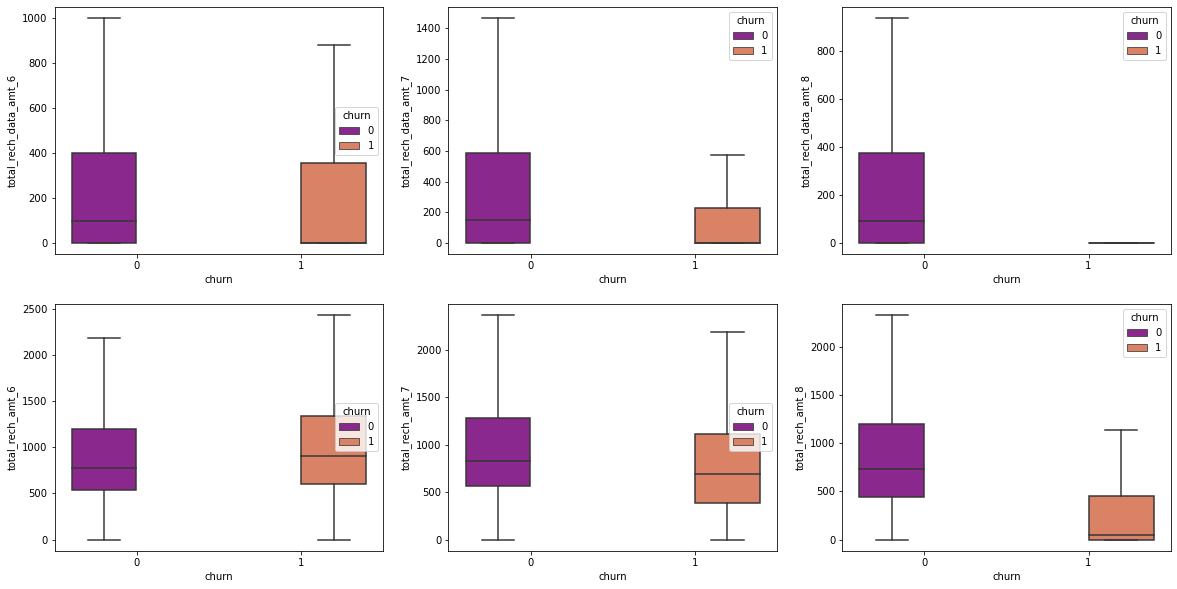

In [23]:
plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
sns.boxplot(data=HighValueCustomers, y="total_rech_data_amt_6",x="churn",hue="churn",
            showfliers=False,palette=("plasma"))
plt.subplot(2,3,2)
sns.boxplot(data=HighValueCustomers, y="total_rech_data_amt_7",x="churn",hue="churn",
            showfliers=False,palette=("plasma"))
plt.subplot(2,3,3)
sns.boxplot(data=HighValueCustomers, y="total_rech_data_amt_8",x="churn",hue="churn",
            showfliers=False,palette=("plasma"))

plt.subplot(2,3,4)
sns.boxplot(data=HighValueCustomers, y="total_rech_amt_6",x="churn",hue="churn",
            showfliers=False,palette=("plasma"))
plt.subplot(2,3,5)
sns.boxplot(data=HighValueCustomers, y="total_rech_amt_7",x="churn",hue="churn",
            showfliers=False,palette=("plasma"))
plt.subplot(2,3,6)
sns.boxplot(data=HighValueCustomers, y="total_rech_amt_8",x="churn",hue="churn",
            showfliers=False,palette=("plasma"))

plt.show()

**Analysis:** 
- We can see a drop in the total recharge amount for churned customers in the 8th Month (Action Phase).
- We can see that there is a huge drop in total recharge amount for data in the 8th month (action phase) for churned customers.

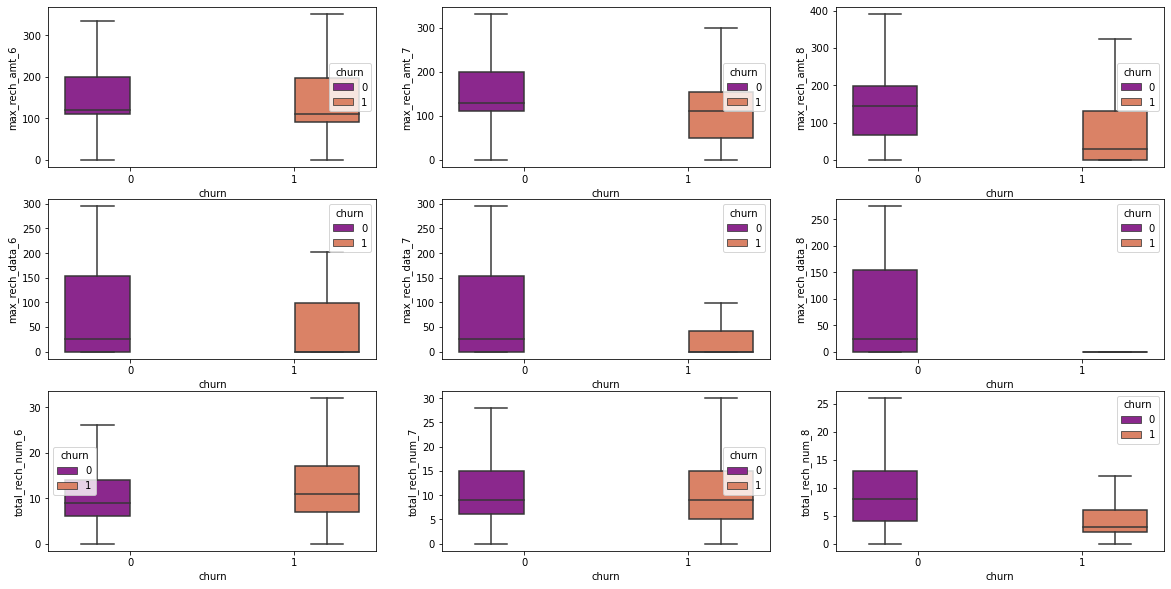

In [24]:
plt.figure(figsize=(20,10))
plt.subplot(3,3,1)
sns.boxplot(data=HighValueCustomers, y="max_rech_amt_6",x="churn",hue="churn",
            showfliers=False,palette=("plasma"))
plt.subplot(3,3,2)
sns.boxplot(data=HighValueCustomers, y="max_rech_amt_7",x="churn",hue="churn",
            showfliers=False,palette=("plasma"))
plt.subplot(3,3,3)
sns.boxplot(data=HighValueCustomers, y="max_rech_amt_8",x="churn",hue="churn",
            showfliers=False,palette=("plasma"))

plt.subplot(3,3,4)
sns.boxplot(data=HighValueCustomers, y="max_rech_data_6",x="churn",hue="churn",
            showfliers=False,palette=("plasma"))
plt.subplot(3,3,5)
sns.boxplot(data=HighValueCustomers, y="max_rech_data_7",x="churn",hue="churn",
            showfliers=False,palette=("plasma"))
plt.subplot(3,3,6)
sns.boxplot(data=HighValueCustomers, y="max_rech_data_8",x="churn",hue="churn",
            showfliers=False,palette=("plasma"))

plt.subplot(3,3,7)
sns.boxplot(data=HighValueCustomers, y="total_rech_num_6",x="churn",hue="churn",
            showfliers=False,palette=("plasma"))
plt.subplot(3,3,8)
sns.boxplot(data=HighValueCustomers, y="total_rech_num_7",x="churn",hue="churn",
            showfliers=False,palette=("plasma"))
plt.subplot(3,3,9)
sns.boxplot(data=HighValueCustomers, y="total_rech_num_8",x="churn",hue="churn",
            showfliers=False,palette=("plasma"))

plt.show()

**Analysis:** 
- We can see a drop in maximum recharge amount for churned customers in the 8th Month (Action Phase).
- We can see that there is a huge drop in maximum recharge amount for data in the 8th month (action phase) for churned customers.
- We can see that there is a huge drop in total recharge number also in the 8th month (action phase) for churned customers.


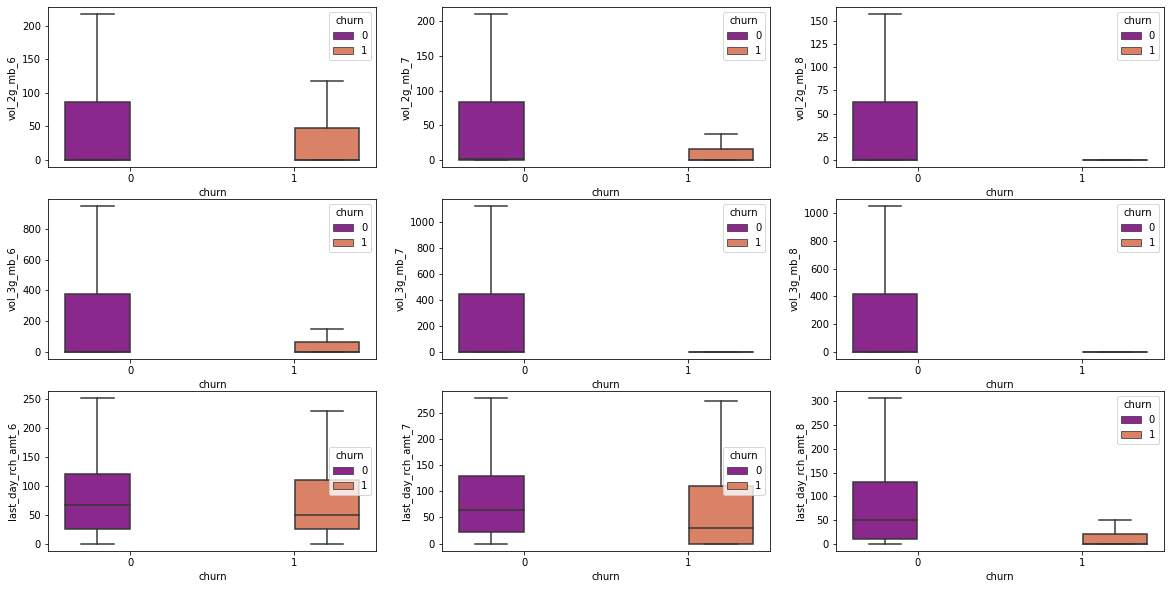

In [25]:
plt.figure(figsize=(20,10))
plt.subplot(3,3,1)
sns.boxplot(data=HighValueCustomers, y="vol_2g_mb_6",x="churn",hue="churn",
            showfliers=False,palette=("plasma"))
plt.subplot(3,3,2)
sns.boxplot(data=HighValueCustomers, y="vol_2g_mb_7",x="churn",hue="churn",
            showfliers=False,palette=("plasma"))
plt.subplot(3,3,3)
sns.boxplot(data=HighValueCustomers, y="vol_2g_mb_8",x="churn",hue="churn",
            showfliers=False,palette=("plasma"))

plt.subplot(3,3,4)
sns.boxplot(data=HighValueCustomers, y="vol_3g_mb_6",x="churn",hue="churn",
            showfliers=False,palette=("plasma"))
plt.subplot(3,3,5)
sns.boxplot(data=HighValueCustomers, y="vol_3g_mb_7",x="churn",hue="churn",
            showfliers=False,palette=("plasma"))
plt.subplot(3,3,6)
sns.boxplot(data=HighValueCustomers, y="vol_3g_mb_8",x="churn",hue="churn",
            showfliers=False,palette=("plasma"))

plt.subplot(3,3,7)
sns.boxplot(data=HighValueCustomers, y="last_day_rch_amt_6",x="churn",hue="churn",
            showfliers=False,palette=("plasma"))
plt.subplot(3,3,8)
sns.boxplot(data=HighValueCustomers, y="last_day_rch_amt_7",x="churn",hue="churn",
            showfliers=False,palette=("plasma"))
plt.subplot(3,3,9)
sns.boxplot(data=HighValueCustomers, y="last_day_rch_amt_8",x="churn",hue="churn",
            showfliers=False,palette=("plasma"))

plt.show()

**Analysis:** 
- 2G and 3G usage for churned customers drops in 8th month
- We also see that 2G/3G usage is higher for non-churned customers indicating that churned customers might be from areas where 2G/3G service is not properly available.
- We are seeing a huge drop in Last day of recharge amount for 8th month

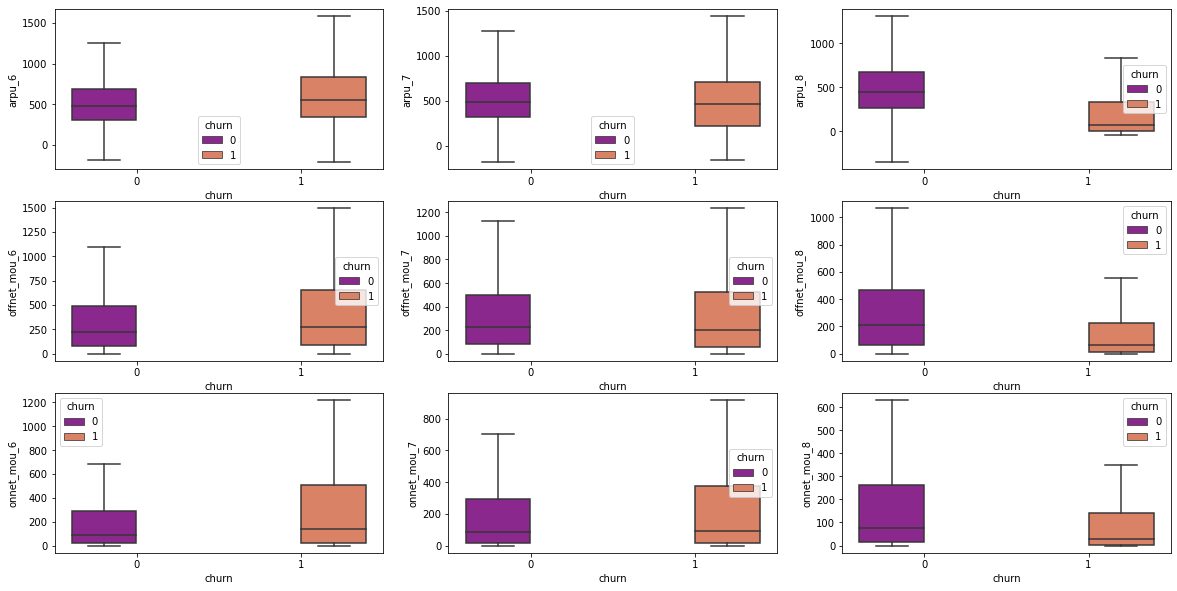

In [26]:
plt.figure(figsize=(20,10))
plt.subplot(3,3,1)
sns.boxplot(data=HighValueCustomers, y="arpu_6",x="churn",hue="churn",
            showfliers=False,palette=("plasma"))
plt.subplot(3,3,2)
sns.boxplot(data=HighValueCustomers, y="arpu_7",x="churn",hue="churn",
            showfliers=False,palette=("plasma"))
plt.subplot(3,3,3)
sns.boxplot(data=HighValueCustomers, y="arpu_8",x="churn",hue="churn",
            showfliers=False,palette=("plasma"))

plt.subplot(3,3,4)
sns.boxplot(data=HighValueCustomers, y="offnet_mou_6",x="churn",hue="churn",
            showfliers=False,palette=("plasma"))
plt.subplot(3,3,5)
sns.boxplot(data=HighValueCustomers, y="offnet_mou_7",x="churn",hue="churn",
            showfliers=False,palette=("plasma"))
plt.subplot(3,3,6)
sns.boxplot(data=HighValueCustomers, y="offnet_mou_8",x="churn",hue="churn",
            showfliers=False,palette=("plasma"))

plt.subplot(3,3,7)
sns.boxplot(data=HighValueCustomers, y="onnet_mou_6",x="churn",hue="churn",
            showfliers=False,palette=("plasma"))
plt.subplot(3,3,8)
sns.boxplot(data=HighValueCustomers, y="onnet_mou_7",x="churn",hue="churn",
            showfliers=False,palette=("plasma"))
plt.subplot(3,3,9)
sns.boxplot(data=HighValueCustomers, y="onnet_mou_8",x="churn",hue="churn",
            showfliers=False,palette=("plasma"))

plt.show()

**Analysis:**
- We can see that huge drops for Arpu in 8th month for churned customers
- We can see the drop for offnet mou services in the 8th month
- We can see the drop for onnnet mou services in the 8th month

In [27]:
# delete variables created to filter high-value customer
HighValueCustomers = HighValueCustomers.drop(['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','Avg_Rech_Amt_6_7'], axis=1)
HighValueCustomers.shape

(30001, 190)

#### finding Data imbalance Ratio based on Target variable called churn

Text(0.5, 1.0, 'Churn Distribution')

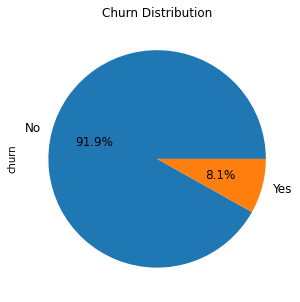

In [28]:
# Lets find out churn/non churn %
ax=(HighValueCustomers['churn'].value_counts()/len(HighValueCustomers)*100).plot.pie(autopct='%.1f%%', labels =['No','Yes'], figsize=(5,5), fontsize = 12)
ax.set_title('Churn Distribution', fontsize=12)

In [29]:
# Lets check columns with no variance in their values & drop such columns
for i in HighValueCustomers.columns:
    if HighValueCustomers[i].nunique() == 1:
        print("\nColumn", i,"has no variance & contains only",HighValueCustomers[i].nunique(),"unique value")
        print("Dropping the column",i)
        HighValueCustomers.drop(i,axis=1,inplace=True)
print("\nDimension of the updated dataset:",HighValueCustomers.shape)


Column loc_og_t2o_mou has no variance & contains only 1 unique value
Dropping the column loc_og_t2o_mou

Column std_og_t2o_mou has no variance & contains only 1 unique value
Dropping the column std_og_t2o_mou

Column loc_ic_t2o_mou has no variance & contains only 1 unique value
Dropping the column loc_ic_t2o_mou

Column std_og_t2c_mou_6 has no variance & contains only 1 unique value
Dropping the column std_og_t2c_mou_6

Column std_og_t2c_mou_7 has no variance & contains only 1 unique value
Dropping the column std_og_t2c_mou_7

Column std_og_t2c_mou_8 has no variance & contains only 1 unique value
Dropping the column std_og_t2c_mou_8

Column std_og_t2c_mou_9 has no variance & contains only 1 unique value
Dropping the column std_og_t2c_mou_9

Column std_ic_t2o_mou_6 has no variance & contains only 1 unique value
Dropping the column std_ic_t2o_mou_6

Column std_ic_t2o_mou_7 has no variance & contains only 1 unique value
Dropping the column std_ic_t2o_mou_7

Column std_ic_t2o_mou_8 has no

In [30]:
# Lets check the null values present in the dataset
(HighValueCustomers.isnull().sum()*100/len(HighValueCustomers)).sort_values(ascending = False)

std_ic_t2f_mou_9         6.336455
loc_og_t2c_mou_9         6.336455
loc_og_t2m_mou_9         6.336455
isd_ic_mou_9             6.336455
loc_og_t2f_mou_9         6.336455
isd_og_mou_9             6.336455
loc_og_t2t_mou_9         6.336455
std_ic_mou_9             6.336455
std_og_t2t_mou_9         6.336455
roam_og_mou_9            6.336455
ic_others_9              6.336455
std_ic_t2m_mou_9         6.336455
std_og_mou_9             6.336455
roam_ic_mou_9            6.336455
std_ic_t2t_mou_9         6.336455
og_others_9              6.336455
offnet_mou_9             6.336455
loc_ic_mou_9             6.336455
std_og_t2f_mou_9         6.336455
loc_ic_t2f_mou_9         6.336455
onnet_mou_9              6.336455
loc_ic_t2m_mou_9         6.336455
loc_og_mou_9             6.336455
loc_ic_t2t_mou_9         6.336455
std_og_t2m_mou_9         6.336455
spl_og_mou_9             6.336455
spl_ic_mou_9             6.336455
isd_ic_mou_8             3.913203
ic_others_8              3.913203
std_og_t2f_mou

In [31]:
# Lets check the correlation amongst the features, drop the highly correlated ones
cor = HighValueCustomers.corr()
cor.loc[:,:]=np.tril(cor,k=-1)
cor=cor.stack()
cor[(cor>0.60)| (cor<-0.60)].sort_values()

monthly_3g_6      vol_3g_mb_6         0.601308
total_ic_mou_7    loc_ic_t2t_mou_7    0.601684
total_og_mou_8    onnet_mou_9         0.603450
roam_og_mou_8     roam_og_mou_7       0.604862
offnet_mou_8      offnet_mou_6        0.604877
                                        ...   
total_rech_amt_9  arpu_9              0.950539
fb_user_8         night_pck_user_8    0.954831
fb_user_7         night_pck_user_7    0.956322
fb_user_6         night_pck_user_6    0.956620
fb_user_9         night_pck_user_9    0.958548
Length: 343, dtype: float64

In [32]:
# We will drop the columns which are highly correlated (+/- 60%)
col=['loc_og_t2m_mou_6','std_og_t2t_mou_6','std_og_t2t_mou_7','std_og_t2t_mou_8','std_og_t2t_mou_9',
    'std_og_t2m_mou_6','std_og_t2m_mou_7','std_og_t2m_mou_8','std_og_t2m_mou_9',
    'total_og_mou_6','total_og_mou_7','total_og_mou_8',
    'loc_ic_t2t_mou_6','loc_ic_t2t_mou_7','loc_ic_t2t_mou_8','loc_ic_t2t_mou_9',
    'loc_ic_t2m_mou_6','loc_ic_t2m_mou_7','loc_ic_t2m_mou_8','loc_ic_t2m_mou_9',
    'std_ic_t2m_mou_6','std_ic_t2m_mou_7','std_ic_t2m_mou_8','std_ic_t2m_mou_9',
    'total_ic_mou_6','total_ic_mou_7','total_ic_mou_8',
    'total_rech_amt_9','vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8',
    'loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2t_mou_8','loc_og_t2t_mou_9',
    'loc_og_t2f_mou_6','loc_og_t2f_mou_7','loc_og_t2f_mou_8','loc_og_t2f_mou_9',
    'loc_og_t2m_mou_6','loc_og_t2m_mou_7','loc_og_t2m_mou_8','loc_og_t2m_mou_9',
    'loc_ic_t2f_mou_6','loc_ic_t2f_mou_7','loc_ic_t2f_mou_8','loc_ic_t2f_mou_9']
HighValueCustomers.drop(col, axis=1, inplace=True)
HighValueCustomers.shape

(30001, 133)

In [33]:
# Now we will delete 9th month columns because we would predict churn/non-churn later based on data from 1st 3 months
col=[col for col in HighValueCustomers.columns if '_9' in col]
print(col)

HighValueCustomers.drop(col,axis=1,inplace=True)
HighValueCustomers.shape

['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2f_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'max_rech_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'fb_user_9', 'total_rech_data_amt_9']


(30001, 99)

In [34]:
# Lets check the dataset again
(HighValueCustomers.isnull().sum()*100/len(HighValueCustomers)).sort_values(ascending=False)

loc_ic_mou_8             3.913203
std_og_t2f_mou_8         3.913203
isd_ic_mou_8             3.913203
loc_og_mou_8             3.913203
std_og_mou_8             3.913203
loc_og_t2c_mou_8         3.913203
spl_ic_mou_8             3.913203
roam_og_mou_8            3.913203
std_ic_t2t_mou_8         3.913203
isd_og_mou_8             3.913203
roam_ic_mou_8            3.913203
spl_og_mou_8             3.913203
offnet_mou_8             3.913203
std_ic_mou_8             3.913203
onnet_mou_8              3.913203
ic_others_8              3.913203
og_others_8              3.913203
std_ic_t2f_mou_8         3.913203
spl_og_mou_6             1.816606
og_others_6              1.816606
ic_others_6              1.816606
std_ic_t2f_mou_6         1.816606
loc_ic_mou_6             1.816606
std_og_mou_6             1.816606
isd_og_mou_6             1.816606
std_og_t2f_mou_6         1.816606
std_ic_t2t_mou_6         1.816606
loc_og_mou_6             1.816606
loc_og_t2c_mou_6         1.816606
roam_og_mou_6 

### imputing the missing value using fancyimpute, knn

In [35]:
from fancyimpute import KNN

for installing KNN we need to install below library once 
- conda install -c conda-forge cvxpy
- pip install fancyimpute

In [36]:
knn_impute = (KNN(k=5, verbose=True))
HVC_knn = (knn_impute.fit_transform(HighValueCustomers))
HVC_knn = pd.DataFrame(HVC_knn)
HVC_knn.columns = HighValueCustomers.columns

Imputing row 1/30001 with 36 missing, elapsed time: 798.811
Imputing row 101/30001 with 0 missing, elapsed time: 799.062
Imputing row 201/30001 with 18 missing, elapsed time: 799.187
Imputing row 301/30001 with 0 missing, elapsed time: 799.234
Imputing row 401/30001 with 0 missing, elapsed time: 799.250
Imputing row 501/30001 with 0 missing, elapsed time: 799.281
Imputing row 601/30001 with 0 missing, elapsed time: 799.344
Imputing row 701/30001 with 0 missing, elapsed time: 799.406
Imputing row 801/30001 with 0 missing, elapsed time: 799.437
Imputing row 901/30001 with 0 missing, elapsed time: 799.453
Imputing row 1001/30001 with 0 missing, elapsed time: 799.453
Imputing row 1101/30001 with 0 missing, elapsed time: 799.584
Imputing row 1201/30001 with 0 missing, elapsed time: 799.640
Imputing row 1301/30001 with 0 missing, elapsed time: 799.649
Imputing row 1401/30001 with 0 missing, elapsed time: 799.663
Imputing row 1501/30001 with 0 missing, elapsed time: 799.724
Imputing row 1601/

In [37]:
# shape of the filtered high value customer dataset i.e HVC_knn

HVC_knn.shape

(30001, 99)

In [38]:
# missing value check

HVC_knn.isnull().sum()

arpu_6                   0
arpu_7                   0
arpu_8                   0
onnet_mou_6              0
onnet_mou_7              0
onnet_mou_8              0
offnet_mou_6             0
offnet_mou_7             0
offnet_mou_8             0
roam_ic_mou_6            0
roam_ic_mou_7            0
roam_ic_mou_8            0
roam_og_mou_6            0
roam_og_mou_7            0
roam_og_mou_8            0
loc_og_t2c_mou_6         0
loc_og_t2c_mou_7         0
loc_og_t2c_mou_8         0
loc_og_mou_6             0
loc_og_mou_7             0
loc_og_mou_8             0
std_og_t2f_mou_6         0
std_og_t2f_mou_7         0
std_og_t2f_mou_8         0
std_og_mou_6             0
std_og_mou_7             0
std_og_mou_8             0
isd_og_mou_6             0
isd_og_mou_7             0
isd_og_mou_8             0
spl_og_mou_6             0
spl_og_mou_7             0
spl_og_mou_8             0
og_others_6              0
og_others_7              0
og_others_8              0
loc_ic_mou_6             0
l

#### Outlier detection in few columns

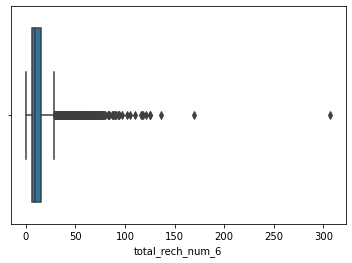

In [39]:
# outlier detection in column total_rech_num_6

sns.boxplot(x='total_rech_num_6', data=HVC_knn)

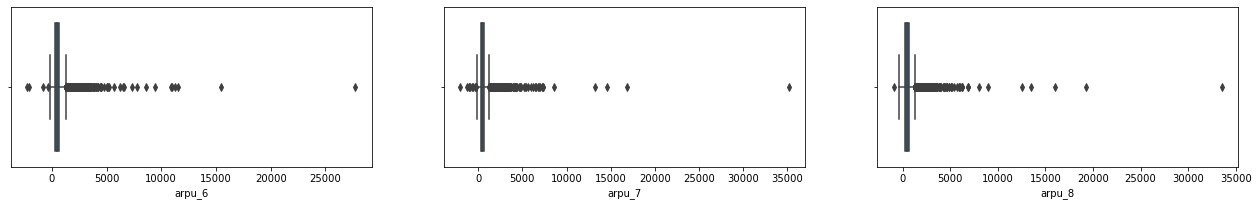

In [40]:
# boxplot of the column arpu_6, arpu_7, arpu_8 to detect the outliers

plt.figure(figsize=(22,10))
plt.subplot(3,3,1)
sns.boxplot(x='arpu_6', data=HVC_knn)

plt.subplot(3,3,2)
sns.boxplot(x='arpu_7', data=HVC_knn)

plt.subplot(3,3,3)
sns.boxplot(x='arpu_8', data=HVC_knn)

plt.show()

In [41]:
# Function to plot the histogram with labels

def plot_hist(dataset,col,binsize):
    fig, ax = plt.subplots(figsize=(20,4))
    counts,bins,patches=ax.hist(dataset[col],bins=range(0,int(dataset[col].max()),round(binsize)),facecolor='lightgreen',edgecolor='gray')
    
    # Set the ticks to be at the edges of the bins.
    ax.set_xticks(bins)
    bin_centers = 0.5 * np.diff(bins) + bins[:-1]
    for count, x in zip(counts, bin_centers):
        # Label the percentages
        percent = '%0.0f%%' % (100 * float(count) / counts.sum())
        ax.annotate(percent, xy=(x,0.2), xycoords=('data', 'axes fraction'),
        xytext=(0, -32), textcoords='offset points', va='top', ha='center')
    
    ax.set_xlabel(col.upper())
    ax.set_ylabel('Count')
    # Give ourselves some more room at the bottom of the plot
    #plt.subplots_adjust(bottom=0.15)
    plt.show()

count    30001.000000
mean      1209.368754
std        957.677989
min        180.000000
25%        460.000000
50%        846.000000
75%       1756.000000
max       4321.000000
Name: aon, dtype: float64


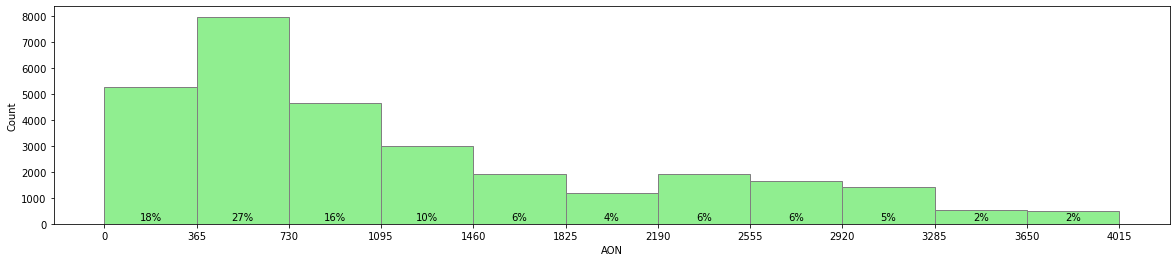

In [42]:
# Customers distribution of the age on network

print(HVC_knn.aon.describe())
plot_hist(HVC_knn,'aon',365)

In [43]:
# Create Derived categorical variable

HVC_knn['aon_bin'] = pd.cut(HighValueCustomers['aon'], range(0,HighValueCustomers['aon'].max(),365), labels=range(0,int(round(HighValueCustomers['aon'].max()/365))-1))

In [44]:
# HVC_knn['aon'].dtype

int(round(HVC_knn['aon'].max()/365))

12

#### arpu VS Churn

In [45]:
def plot_byChurn(data,col):
    # per month churn vs Non-Churn
    fig, ax = plt.subplots(figsize=(7,4))
    colList=list(data.filter(regex=(col)).columns)
    colList = colList[:3]
    plt.plot(HVC_knn.groupby('churn')[colList].mean().T)
    ax.set_xticklabels(['Jun','Jul','Aug','Sep'])
    ## Add legend
    plt.legend(['Non-Churn', 'Churn'])
    # Add titles
    plt.title( str(col) +" V/S Month", loc='left', fontsize=12, fontweight=0, color='orange')
    plt.xlabel("Month")
    plt.ylabel(col)
    plt.show()
    # Numeric stats for per month churn vs Non-Churn
    return HVC_knn.groupby('churn')[colList].mean()

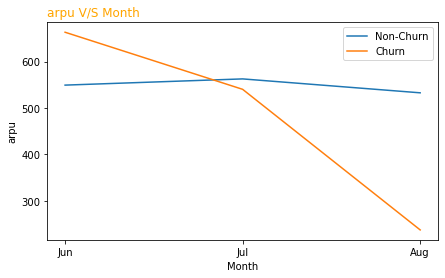

,arpu_6,arpu_7,arpu_8
churn,,,
0.0,549.220390,562.608191,532.635710
1.0,663.158246,540.165968,237.200793


In [46]:
plot_byChurn(HVC_knn,'arpu')

#### last_day_rch_amt VS Churn

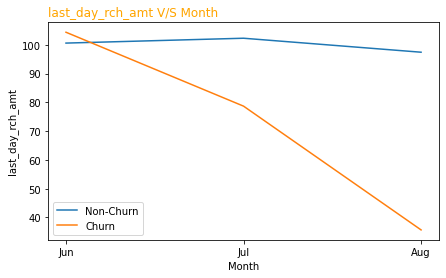

,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8
churn,,,
0.0,100.586938,102.275508,97.416800
1.0,104.356002,78.684146,35.680049


In [47]:
plot_byChurn(HVC_knn,'last_day_rch_amt')

#### max_rech_amt VS Churn

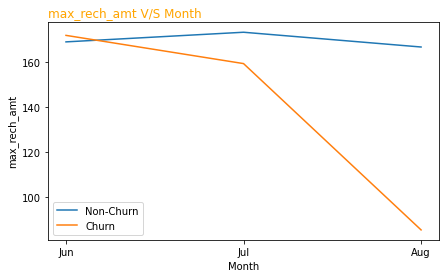

,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8
churn,,,
0.0,169.049456,173.336575,166.767199
1.0,171.942237,159.388775,85.370750


In [48]:
plot_byChurn(HVC_knn,'max_rech_amt')

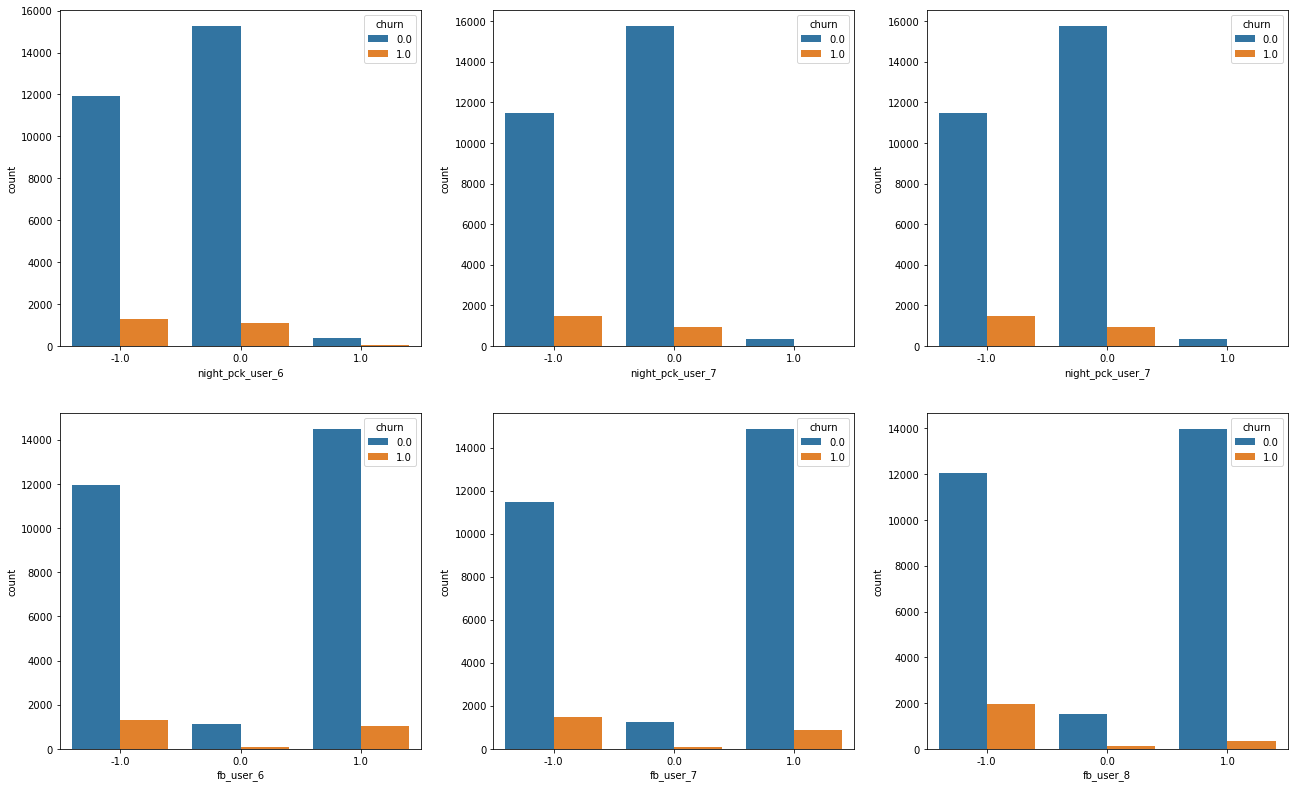

In [49]:
# 

plt.figure(figsize=(22,21))
plt.subplot(3,3,1)
sns.countplot(x='night_pck_user_6', hue='churn',data=HVC_knn)

plt.subplot(3,3,2)
sns.countplot(x='night_pck_user_7', hue='churn',data=HVC_knn)

plt.subplot(3,3,3)
sns.countplot(x='night_pck_user_7', hue='churn',data=HVC_knn)

plt.subplot(3,3,4)
sns.countplot(x='fb_user_6', hue='churn',data=HVC_knn)
# plt.title('Count Distribution of BldgType')
plt.subplot(3,3,5)
sns.countplot(x='fb_user_7', hue='churn',data=HVC_knn)
# plt.title('Count Distribution of HouseStyle')
plt.subplot(3,3,6)
sns.countplot(x='fb_user_8', hue='churn',data=HVC_knn)
# plt.title('Count Distribution of RoofStyle')


plt.show()

In [50]:
# function to understand the pattern of churn during the course of month

def plot_byChurnMou(colList,calltype):
    fig, ax = plt.subplots(figsize=(7,4))
    df=HVC_knn.groupby(['churn'])[colList].mean().T
    plt.plot(df)
    ax.set_xticklabels(['Jun','Jul','Aug','Sep'])
    ## Add legend
    plt.legend(['Non-Churn', 'Churn'])
    # Add titles
    plt.title("Avg. "+calltype+" MOU  V/S Month", loc='left', fontsize=12, fontweight=0, color='orange')
    plt.xlabel("Month")
    plt.ylabel("Avg. "+calltype+" MOU")

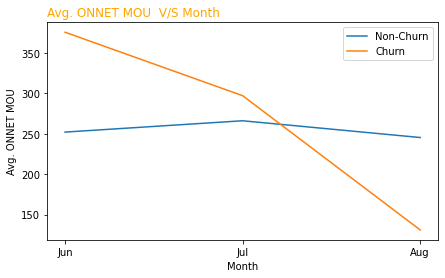

In [51]:
# churn pattern during the course of month on the basis of onnet_mou i.e on same network minutes of usage

onnet_col = ['onnet_mou_6','onnet_mou_7','onnet_mou_8']
plot_byChurnMou(onnet_col,'ONNET')

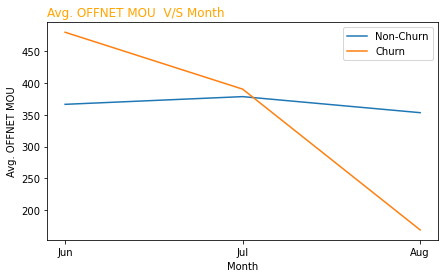

In [52]:
# churn pattern during the course of month on the basis of offnet_mou i.e on other network minutes of usage

offnet_col = ['offnet_mou_6','offnet_mou_7','offnet_mou_8']
plot_byChurnMou(offnet_col,'OFFNET')

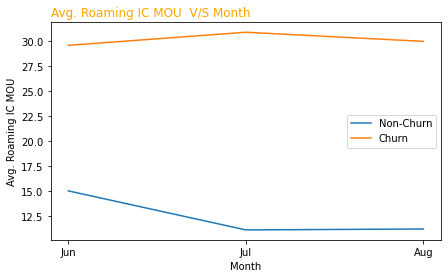

In [53]:
# churn pattern during the course of month on the basis of incoming roaming minutes of usage

roam_ic_mou_col = ['roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8']
plot_byChurnMou(roam_ic_mou_col,'Roaming IC')

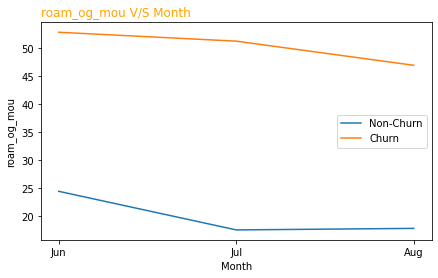

,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8
churn,,,
0.0,24.455099,17.550959,17.824711
1.0,52.903516,51.309043,46.993528


In [54]:
# churn pattern during the course of month on the basis of outgoing roaming minutes of usage

plot_byChurn(HVC_knn,'roam_og_mou')

In [55]:
# dropping variable of 9th month i.e churn
# sachet_3g_9 

HVC_knn = HVC_knn.drop(['sep_vbc_3g'],axis=1)

In [56]:
# describing the column incoming others for 6th,7th,8th month

HVC_knn[['ic_others_6','ic_others_7','ic_others_8']].describe(percentiles=(0.1,0.2,0.3,0.4,0.5,0.6,0.70,0.75,0.80,0.9,0.99))

,ic_others_6,ic_others_7,ic_others_8
count,30001.000000,30001.000000,30001.000000
mean,1.165424,1.510334,1.242072
std,13.993438,15.999107,12.785004
min,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000
20%,0.000000,0.000000,0.000000
30%,0.000000,0.000000,0.000000
40%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
60%,0.000000,0.000000,0.000000


In [57]:
# as stats of above 3 variables are same will create a single column by adding them i.e ic_others_6to8

HVC_knn['ic_others_6to8'] = HVC_knn['ic_others_6']+HVC_knn['ic_others_7']+HVC_knn['ic_others_8']

In [58]:
# will drop 3 columns ic_others_6, ic_others_7, ic_others_8

HVC_knn = HVC_knn.drop(['ic_others_6','ic_others_7','ic_others_8'], axis=1)

#### Step 4: Data Preparation
Outlier Treatment

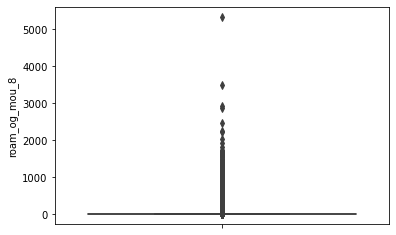

In [59]:
sns.boxplot(y='roam_og_mou_8', data=HVC_knn)

In [60]:
# outlier treatment

cont_cols = [col for col in HVC_knn.columns if col not in ['churn']]

for col in cont_cols:
    percentiles = HVC_knn[col].quantile([0.01,0.99]).values
    HVC_knn[col][HVC_knn[col] <= percentiles[0]] = percentiles[0]
    HVC_knn[col][HVC_knn[col] >= percentiles[1]] = percentiles[1]

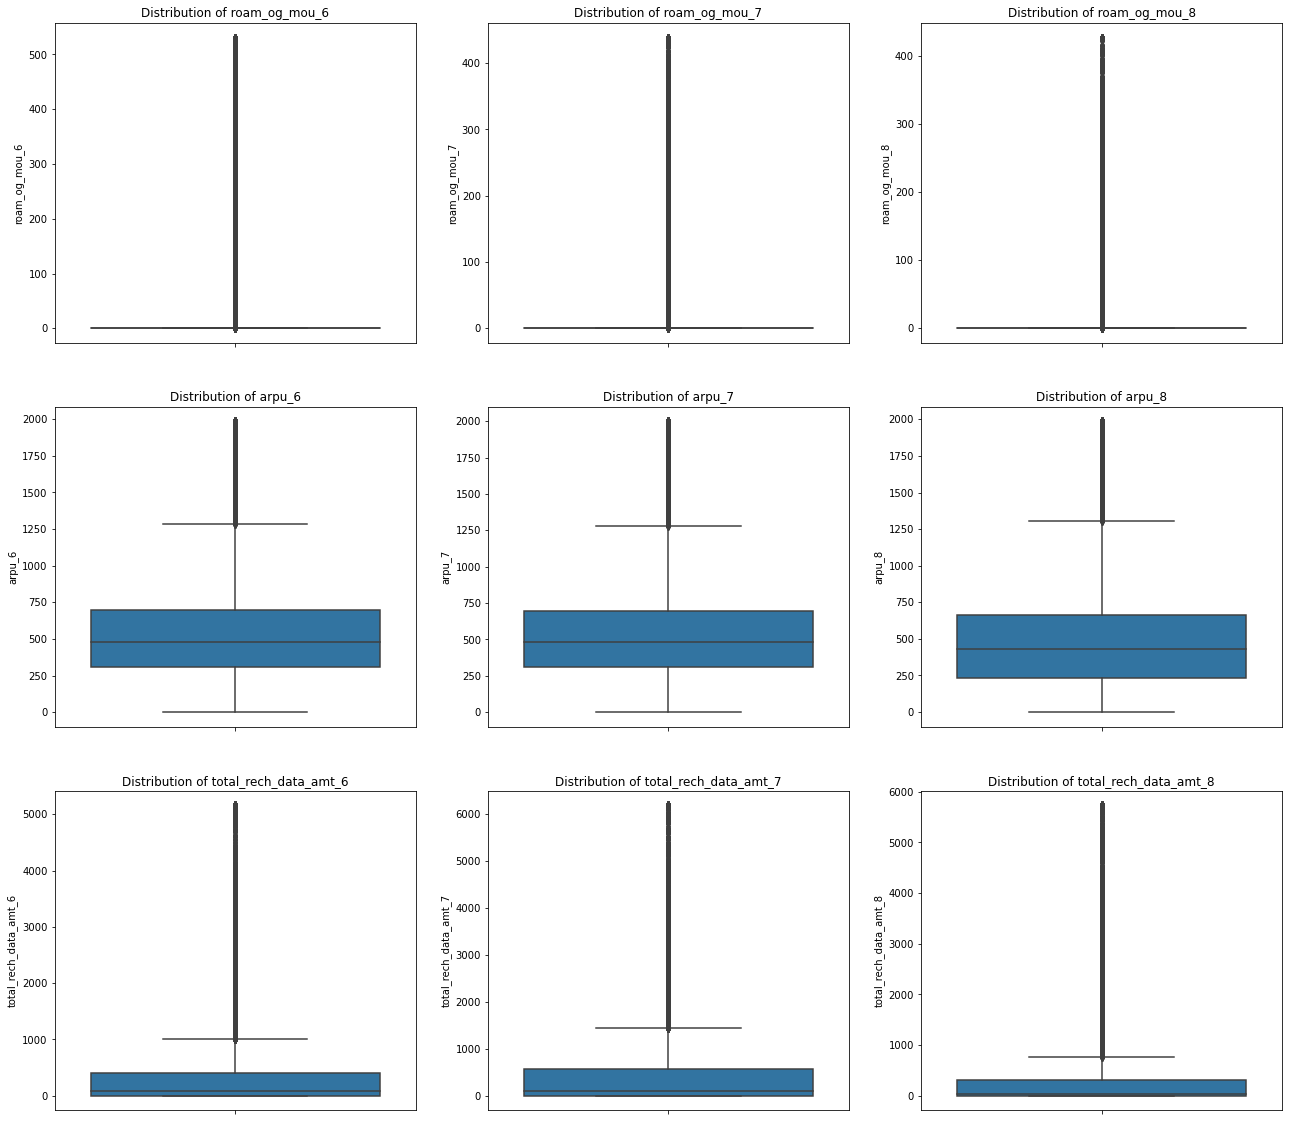

In [61]:
plt.figure(figsize=(22,20))
plt.subplot(3,3,1)
sns.boxplot(y='roam_og_mou_6', data=HVC_knn)
plt.title('Distribution of roam_og_mou_6')

plt.subplot(3,3,2)
sns.boxplot(y='roam_og_mou_7', data=HVC_knn)
plt.title('Distribution of roam_og_mou_7')

plt.subplot(3,3,3)
sns.boxplot(y='roam_og_mou_8', data=HVC_knn)
plt.title('Distribution of roam_og_mou_8')

plt.subplot(3,3,4)
sns.boxplot(y='arpu_6', data=HVC_knn)
plt.title('Distribution of arpu_6')

plt.subplot(3,3,5)
sns.boxplot(y='arpu_7', data=HVC_knn)
plt.title('Distribution of arpu_7')

plt.subplot(3,3,6)
sns.boxplot(y='arpu_8', data=HVC_knn)
plt.title('Distribution of arpu_8')

plt.subplot(3,3,7)
sns.boxplot(y='total_rech_data_amt_6', data=HVC_knn)
plt.title('Distribution of total_rech_data_amt_6')

plt.subplot(3,3,8)
sns.boxplot(y='total_rech_data_amt_7', data=HVC_knn)
plt.title('Distribution of total_rech_data_amt_7')

plt.subplot(3,3,9)
sns.boxplot(y='total_rech_data_amt_8', data=HVC_knn)
plt.title('Distribution of total_rech_data_amt_8')
plt.show()

In [62]:
# dropping aon bin column

HVC_knn = HVC_knn.drop(['aon_bin'], axis=1)

In [63]:
# converting the aon colum to years as the data present in this column is in days

HVC_knn['aon'] = HVC_knn['aon'].astype('int')

In [64]:
HVC_knn['aon'] = HVC_knn['aon']/365
HVC_knn['aon'] = HVC_knn['aon'].apply(np.ceil)

In [65]:
HVC_knn['aon'].head()

0    3.0
1    3.0
2    1.0
3    2.0
4    2.0
Name: aon, dtype: float64

### Feature scaling using standard scalar

In [66]:
# Below are the selected columns on which standard scalar will be applied

col_scale = ['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6',
       'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2c_mou_6',
       'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7',
       'loc_og_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7',
       'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8',
       'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6',
       'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7',
       'og_others_8', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8',
       'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8',
       'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8',
       'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'spl_ic_mou_6',
       'spl_ic_mou_7', 'spl_ic_mou_8', 'isd_ic_mou_6', 'isd_ic_mou_7',
       'isd_ic_mou_8', 'total_rech_num_6', 'total_rech_num_7',
       'total_rech_num_8', 'max_rech_amt_6', 'max_rech_amt_7',
       'max_rech_amt_8', 'last_day_rch_amt_6', 'last_day_rch_amt_7',
       'last_day_rch_amt_8', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8',
       'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8',
       'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6',
       'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_6', 'monthly_3g_7',
       'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8',
       'fb_user_6', 'fb_user_7', 'fb_user_8', 'aon', 'aug_vbc_3g',
       'jul_vbc_3g', 'jun_vbc_3g', 'total_rech_data_amt_6',
       'total_rech_data_amt_7', 'total_rech_data_amt_8', 'ic_others_6to8']

In [67]:
# standard scalar

from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
HVC_knn[col_scale] = scalar.fit_transform(HVC_knn[col_scale])
HVC_knn.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,churn,ic_others_6to8
0,-0.981293,-0.932973,-0.742104,-0.623558,-0.614200,-0.580840,-0.796587,-0.822423,-0.804238,-0.277284,-0.250892,-0.256172,-0.288800,-0.267573,-0.269277,-0.159822,-0.353757,-0.345716,-0.715243,-0.746217,-0.747792,-0.242011,-0.238670,-0.235956,-0.603319,-0.610342,-0.557348,-0.159844,-0.161200,-0.153745,0.023028,-0.506862,-0.502507,-0.381423,0.0,0.0,-0.716658,-0.796187,-0.814285,-0.385159,-0.363271,-0.367068,-0.267225,-0.283193,-0.286991,-0.416592,-0.482714,-0.483305,-0.281475,0.064049,-0.27395,-0.183106,-0.169400,-0.254907,-0.910296,-0.992863,-0.923280,0.561004,0.534014,0.651698,1.403453,1.384173,1.525398,1.750798,1.721693,1.816500,-0.328994,-0.428845,-0.377315,0.820593,0.808629,0.877856,-0.405519,-0.411758,-0.384384,-0.447405,-0.470068,-0.441831,1.451451,1.395291,1.469397,-0.289488,-0.274042,-0.259548,0.946418,0.932485,1.019464,-0.300524,-0.365591,-0.450988,-0.139295,-0.188109,-0.232704,-0.169502,1.0,-0.318165
1,1.453044,2.216163,3.883180,-0.484254,-0.489606,-0.446892,0.197490,0.442906,-0.005757,0.051519,0.609272,0.551285,0.010192,-0.067463,0.358798,-0.346345,-0.353757,-0.345716,0.534206,0.889306,0.079929,1.005373,3.572703,3.290666,-0.501127,-0.481433,-0.412070,-0.159844,-0.120285,2.858500,-0.073584,-0.506862,0.047242,-0.381423,0.0,0.0,0.757783,0.470935,-0.122391,0.825263,-0.016677,0.625684,6.954436,4.362360,3.132582,1.640316,1.445688,1.871702,1.094161,-0.230923,-0.27395,-0.188040,0.183645,0.749370,-0.792175,-0.761521,-0.334339,5.481337,4.000673,5.457748,-0.874613,-0.859924,4.434953,-0.755252,-0.765944,-0.707773,-0.440378,-0.433730,-0.400829,-1.097043,-1.121490,-1.043539,-0.405519,-0.411758,-0.384384,-0.447405,-0.470068,-0.441831,-0.382949,-0.385158,-0.370246,-0.289488,-0.274042,-0.259548,-1.102100,-1.122798,-1.037634,-0.300524,-0.288762,-0.399482,-0.377285,-0.487285,-0.489258,-0.443840,1.0,5.525479
2,-0.474944,-0.163311,-0.941539,0.397013,0.219495,-0.490977,-0.630511,-0.655224,-0.469861,-0.277284,-0.250892,-0.256172,-0.288800,-0.267573,-0.269277,-0.346345,-0.353757,1.278783,0.399077,0.123780,-0.543799,-0.242011,-0.238670,-0.235956,-0.376322,-0.363799,-0.373922,-0.159844,-0.161200,-0.153745,-0.475431,-0.506862,0.362713,-0.381423,0.0,0.0,-0.543132,-0.766015,-0.775067,-0.386719,-0.365417,-0.363801,-0.281331,-0.283193,-0.286991,-0.233815,-0.440814,-0.474197,-0.435239,-0.230923,-0.27395,-0.255537,-0.264489,-0.254907,0.861526,1.089214,0.490179,-0.504629,-0.097459,-0.874688,-0.422616,-0.859924,-0.724162,-0.755252,0.754278,-0.477383,-0.440378,0.883603,-0.400706,-1.097043,0.808629,0.877856,-0.405519,1.855293,-0.384384,-0.447405,-0.069554,0.858778,-0.382949,-0.385158,-0.370246,-0.289488,-0.274042,-0.259548,-1.102100,0.932485,1.019464,-1.

#### train test split

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
#putting features variables in X
X = HVC_knn.drop(['churn'], axis=1)

#putting response variables in Y
y = HVC_knn['churn']    

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [70]:
# print shapes of train and test sets

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(21000, 95)
(21000,)
(9001, 95)
(9001,)


#### Handling class imbalance

In [71]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))
print("Before OverSampling, churn event rate : {}% \n".format(round(sum(y_train==1)/len(y_train)*100,2)))

Before OverSampling, counts of label '1': 1691
Before OverSampling, counts of label '0': 19309 

Before OverSampling, churn event rate : 8.05% 



- pip install -U imbalanced-learn

### Handling the class imbalance using smote

In [72]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='auto', random_state=0, k_neighbors=5, n_jobs=-1)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

In [73]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))
print("After OverSampling, churn event rate : {}% \n".format(round(sum(y_train_res==1)/len(y_train_res)*100,2)))

After OverSampling, the shape of train_X: (38618, 95)
After OverSampling, the shape of train_y: (38618,) 

After OverSampling, counts of label '1': 19309
After OverSampling, counts of label '0': 19309
After OverSampling, churn event rate : 50.0% 



### Interpretable Model without PCA 

#### Logistic Regression using RFE

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics

In [75]:
#  Logistic regression model using rfe

logreg = LogisticRegression()
rfe = RFE(logreg, 35)
rfe = rfe.fit(X_train_res, y_train_res)

In [76]:
# supported columns in the rfe

col = X_train_res.columns[rfe.support_]
col

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_8', 'offnet_mou_7',
       'offnet_mou_8', 'roam_og_mou_8', 'loc_og_mou_7', 'std_og_mou_8',
       'og_others_6', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8',
       'std_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_6', 'total_rech_num_7',
       'total_rech_num_8', 'last_day_rch_amt_8', 'vol_2g_mb_7', 'vol_2g_mb_8',
       'night_pck_user_7', 'night_pck_user_8', 'monthly_2g_7', 'monthly_2g_8',
       'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_7',
       'sachet_3g_7', 'fb_user_7', 'fb_user_8', 'aon', 'aug_vbc_3g',
       'total_rech_data_amt_7'],
      dtype='object')

In [77]:
# columns discarded in RFE
X_train_res.columns[~rfe.support_]

Index(['onnet_mou_6', 'onnet_mou_7', 'offnet_mou_6', 'roam_ic_mou_6',
       'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'loc_og_mou_6', 'loc_og_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7',
       'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'isd_og_mou_6',
       'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7',
       'spl_og_mou_8', 'og_others_7', 'og_others_8', 'std_ic_t2t_mou_6',
       'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 'std_ic_t2f_mou_6',
       'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8', 'std_ic_mou_6', 'std_ic_mou_7',
       'spl_ic_mou_6', 'spl_ic_mou_7', 'isd_ic_mou_7', 'isd_ic_mou_8',
       'total_rech_num_6', 'max_rech_amt_6', 'max_rech_amt_7',
       'max_rech_amt_8', 'last_day_rch_amt_6', 'last_day_rch_amt_7',
       'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'vol_2g_mb_6',
       'night_pck_user_6', 'monthly_2g_6', 'monthly_3g_6', 'mo

#### Model - 1

In [78]:
x_train_sm = sm.add_constant(X_train_res[col])
logm1 = sm.GLM(y_train_res, x_train_sm, family=sm.families.Binomial()).fit()
logm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38618
Model:                            GLM   Df Residuals:                    38582
Model Family:                Binomial   Df Model:                           35
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15009.
Date:                Mon, 30 Nov 2020   Deviance:                       30017.
Time:                        00:46:44   Pearson chi2:                 6.17e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.7159      0.025    -68.752      0.000      -1.765      -1.667
arpu_6                    0.2475      0.020     12.257      0.000       0.208       0.287
arpu_7                    0.3865      0.031     12.594      0.000       0.326       0.447
arpu_8                   -0.4563      0.040    -11.513      0.000      -0.534      -0.379
onnet_mou_8              -0.5434      0.062     -8.701      0.000      -0.666      -0.421
offnet_mou_7              0.1016      0.032      3.180      0.001       0.039       0.164
offnet_mou_8             -0.7517      0.065    -11.609      0.000      -0.879      -0.625
roam_og_mou_8             0.3897      0.018     21.495      0.000       0.354       0.425
loc_og_mou_7             -0.1781      0.039     -4.586      0.000      -0.254      -0.102
std_og_mou_8              0.5895      0.079      7.487      0.000       0.435       0.744
og_others_6              -0.1427      0.017     -8.390      0.000      -0.176      -0.109
loc_ic_mou_6              0.2498      0.035      7.182      0.000       0.182       0.318
loc_ic_mou_7              0.2048      0.045      4.582      0.000       0.117       0.292
loc_ic_mou_8             -1.0566      0.053    -19.873      0.000      -1.161      -0.952
std_ic_mou_8             -0.2465      0.023    -10.927      0.000      -0.291      -0.202
spl_ic_mou_8             -0.3975      0.025    -15.691      0.000      -0.447      -0.348
isd_ic_mou_6              0.1385      0.016      8.565      0.000       0.107       0.170
total_rech_num_7          0.2004      0.030      6.752      0.000       0.142       0.259
total_rech_num_8         -0.8073      0.038    -21.321      0.000      -0.882      -0.733
last_day_rch_amt_8       -0.5282      0.022    -24.023      0.000      -0.571      -0.485
vol_2g_mb_7               0.1800      0.024      7.384      0.000       0.132       0.228
vol_2g_mb_8              -0.4778      0.038    -12.624      0.000      -0.552      -0.404
night_pck_user_7         -0.3386      0.067     -5.037      0.000      -0.470      -0.207
night_pck_user_8          0.1405      0.071      1.966      0.049       0.000       0.281
monthly_2g_7             -0.2077      0.030     -7.017      0.000      -0.266      -0.150
monthly_2g_8             -0.1665      0.031     -5.405      0.000      -0.227      -0.106
sachet_2g_6               0.1053      0.021      5.008      0.000       0.064       0.146
sachet_2g_7               0.1737      0.042      4.124      0.000       0.091       0.256
sachet_2g_8              -0.3857      0.038    -10.172      0.000      -0.460      -0.311
monthly_3g_7              0.1444      0.032      4.577      0.000       0.083       0.206
sachet_3g_7               0.1000      0.023      4.267      0.000       0.054       0.146
fb_user_7              

In [79]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_res[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_res[col].values, i) for i in range(X_train_res[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
31,fb_user_8,24.74
30,fb_user_7,23.10
22,night_pck_user_8,21.76
21,night_pck_user_7,20.02
8,std_og_mou_8,11.56
5,offnet_mou_8,8.80
3,onnet_mou_8,7.21
26,sachet_2g_7,6.63
2,arpu_8,6.44
11,loc_ic_mou_7,5.99


#### Dropping 'fb_user_8','fb_user_7' because of high VIF

In [80]:
col = col.drop(['fb_user_8','fb_user_7'], 1)
col

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_8', 'offnet_mou_7',
       'offnet_mou_8', 'roam_og_mou_8', 'loc_og_mou_7', 'std_og_mou_8',
       'og_others_6', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8',
       'std_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_6', 'total_rech_num_7',
       'total_rech_num_8', 'last_day_rch_amt_8', 'vol_2g_mb_7', 'vol_2g_mb_8',
       'night_pck_user_7', 'night_pck_user_8', 'monthly_2g_7', 'monthly_2g_8',
       'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_7',
       'sachet_3g_7', 'aon', 'aug_vbc_3g', 'total_rech_data_amt_7'],
      dtype='object')

#### Model 2

In [81]:
x_train_sm = sm.add_constant(X_train_res[col])
logm2 = sm.GLM(y_train_res, x_train_sm, family=sm.families.Binomial()).fit()
logm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38618
Model:                            GLM   Df Residuals:                    38584
Model Family:                Binomial   Df Model:                           33
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15033.
Date:                Mon, 30 Nov 2020   Deviance:                       30066.
Time:                        00:46:48   Pearson chi2:                 6.28e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.7199      0.025    -68.774      0.000      -1.769      -1.671
arpu_6                    0.2462      0.020     12.228      0.000       0.207       0.286
arpu_7                    0.4022      0.031     13.094      0.000       0.342       0.462
arpu_8                   -0.4792      0.040    -12.124      0.000      -0.557      -0.402
onnet_mou_8              -0.5238      0.062     -8.420      0.000      -0.646      -0.402
offnet_mou_7              0.1000      0.032      3.127      0.002       0.037       0.163
offnet_mou_8             -0.7287      0.065    -11.287      0.000      -0.855      -0.602
roam_og_mou_8             0.3944      0.018     21.788      0.000       0.359       0.430
loc_og_mou_7             -0.1795      0.039     -4.628      0.000      -0.256      -0.103
std_og_mou_8              0.5789      0.079      7.365      0.000       0.425       0.733
og_others_6              -0.1421      0.017     -8.357      0.000      -0.175      -0.109
loc_ic_mou_6              0.2503      0.035      7.203      0.000       0.182       0.318
loc_ic_mou_7              0.2106      0.045      4.714      0.000       0.123       0.298
loc_ic_mou_8             -1.0618      0.053    -20.001      0.000      -1.166      -0.958
std_ic_mou_8             -0.2460      0.023    -10.903      0.000      -0.290      -0.202
spl_ic_mou_8             -0.3978      0.025    -15.696      0.000      -0.448      -0.348
isd_ic_mou_6              0.1366      0.016      8.462      0.000       0.105       0.168
total_rech_num_7          0.1960      0.030      6.611      0.000       0.138       0.254
total_rech_num_8         -0.8122      0.038    -21.424      0.000      -0.886      -0.738
last_day_rch_amt_8       -0.5394      0.022    -24.545      0.000      -0.582      -0.496
vol_2g_mb_7               0.1962      0.024      8.130      0.000       0.149       0.244
vol_2g_mb_8              -0.5254      0.038    -13.860      0.000      -0.600      -0.451
night_pck_user_7         -0.0972      0.028     -3.444      0.001      -0.152      -0.042
night_pck_user_8         -0.3211      0.025    -12.936      0.000      -0.370      -0.272
monthly_2g_7             -0.1941      0.029     -6.682      0.000      -0.251      -0.137
monthly_2g_8             -0.1877      0.031     -6.128      0.000      -0.248      -0.128
sachet_2g_6               0.1093      0.021      5.244      0.000       0.068       0.150
sachet_2g_7               0.1736      0.042      4.156      0.000       0.092       0.255
sachet_2g_8              -0.3795      0.038    -10.061      0.000      -0.453      -0.306
monthly_3g_7              0.1461      0.031      4.775      0.000       0.086       0.206
sachet_3g_7               0.1018      0.023      4.375      0.000       0.056       0.147
aon                    

In [82]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_res[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_res[col].values, i) for i in range(X_train_res[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,std_og_mou_8,11.56
5,offnet_mou_8,8.78
3,onnet_mou_8,7.18
26,sachet_2g_7,6.51
2,arpu_8,6.37
11,loc_ic_mou_7,5.99
32,total_rech_data_amt_7,4.87
12,loc_ic_mou_8,4.81
17,total_rech_num_8,4.30
7,loc_og_mou_7,4.16


In [83]:
col = col.drop('std_og_mou_8', 1)
col

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_8', 'offnet_mou_7',
       'offnet_mou_8', 'roam_og_mou_8', 'loc_og_mou_7', 'og_others_6',
       'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_mou_8',
       'spl_ic_mou_8', 'isd_ic_mou_6', 'total_rech_num_7', 'total_rech_num_8',
       'last_day_rch_amt_8', 'vol_2g_mb_7', 'vol_2g_mb_8', 'night_pck_user_7',
       'night_pck_user_8', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6',
       'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_7', 'sachet_3g_7', 'aon',
       'aug_vbc_3g', 'total_rech_data_amt_7'],
      dtype='object')

- Dropping std_og_mou_8 column because of High VIF

#### Model-3

In [84]:
x_train_sm = sm.add_constant(X_train_res[col])
logm3 = sm.GLM(y_train_res, x_train_sm, family=sm.families.Binomial()).fit()
logm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38618
Model:                            GLM   Df Residuals:                    38585
Model Family:                Binomial   Df Model:                           32
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15062.
Date:                Mon, 30 Nov 2020   Deviance:                       30123.
Time:                        00:46:52   Pearson chi2:                 6.40e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.6941      0.025    -68.960      0.000      -1.742      -1.646
arpu_6                    0.2417      0.020     12.006      0.000       0.202       0.281
arpu_7                    0.4170      0.031     13.588      0.000       0.357       0.477
arpu_8                   -0.5196      0.039    -13.266      0.000      -0.596      -0.443
onnet_mou_8              -0.1005      0.022     -4.553      0.000      -0.144      -0.057
offnet_mou_7              0.1496      0.032      4.700      0.000       0.087       0.212
offnet_mou_8             -0.3553      0.039     -9.036      0.000      -0.432      -0.278
roam_og_mou_8             0.3150      0.014     21.840      0.000       0.287       0.343
loc_og_mou_7             -0.3813      0.027    -13.965      0.000      -0.435      -0.328
og_others_6              -0.1413      0.017     -8.311      0.000      -0.175      -0.108
loc_ic_mou_6              0.2543      0.035      7.336      0.000       0.186       0.322
loc_ic_mou_7              0.2748      0.044      6.275      0.000       0.189       0.361
loc_ic_mou_8             -1.1766      0.051    -22.914      0.000      -1.277      -1.076
std_ic_mou_8             -0.2401      0.023    -10.641      0.000      -0.284      -0.196
spl_ic_mou_8             -0.3980      0.025    -15.677      0.000      -0.448      -0.348
isd_ic_mou_6              0.1330      0.016      8.267      0.000       0.101       0.164
total_rech_num_7          0.2014      0.030      6.774      0.000       0.143       0.260
total_rech_num_8         -0.8061      0.038    -21.287      0.000      -0.880      -0.732
last_day_rch_amt_8       -0.5457      0.022    -24.851      0.000      -0.589      -0.503
vol_2g_mb_7               0.1931      0.024      8.019      0.000       0.146       0.240
vol_2g_mb_8              -0.5190      0.038    -13.727      0.000      -0.593      -0.445
night_pck_user_7         -0.0998      0.028     -3.544      0.000      -0.155      -0.045
night_pck_user_8         -0.3164      0.025    -12.772      0.000      -0.365      -0.268
monthly_2g_7             -0.1968      0.029     -6.782      0.000      -0.254      -0.140
monthly_2g_8             -0.1857      0.031     -6.071      0.000      -0.246      -0.126
sachet_2g_6               0.1092      0.021      5.236      0.000       0.068       0.150
sachet_2g_7               0.1717      0.042      4.108      0.000       0.090       0.254
sachet_2g_8              -0.3831      0.038    -10.155      0.000      -0.457      -0.309
monthly_3g_7              0.1472      0.031      4.809      0.000       0.087       0.207
sachet_3g_7               0.0999      0.023      4.292      0.000       0.054       0.146
aon                      -0.4218      0.018    -22.820      0.000      -0.458      -0.386
aug_vbc_3g             

In [85]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_res[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_res[col].values, i) for i in range(X_train_res[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
25,sachet_2g_7,6.51
2,arpu_8,6.30
10,loc_ic_mou_7,5.77
31,total_rech_data_amt_7,4.87
11,loc_ic_mou_8,4.40
16,total_rech_num_8,4.30
5,offnet_mou_8,4.01
20,night_pck_user_7,3.72
1,arpu_7,3.70
9,loc_ic_mou_6,3.62


In [86]:
col = col.drop('sachet_2g_7', 1)
col

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_8', 'offnet_mou_7',
       'offnet_mou_8', 'roam_og_mou_8', 'loc_og_mou_7', 'og_others_6',
       'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_mou_8',
       'spl_ic_mou_8', 'isd_ic_mou_6', 'total_rech_num_7', 'total_rech_num_8',
       'last_day_rch_amt_8', 'vol_2g_mb_7', 'vol_2g_mb_8', 'night_pck_user_7',
       'night_pck_user_8', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6',
       'sachet_2g_8', 'monthly_3g_7', 'sachet_3g_7', 'aon', 'aug_vbc_3g',
       'total_rech_data_amt_7'],
      dtype='object')

- Dropping 'sachet_2g_7' having high VIF

#### Model-4

In [87]:
x_train_sm = sm.add_constant(X_train_res[col])
logm4 = sm.GLM(y_train_res, x_train_sm, family=sm.families.Binomial()).fit()
logm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38618
Model:                            GLM   Df Residuals:                    38586
Model Family:                Binomial   Df Model:                           31
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15070.
Date:                Mon, 30 Nov 2020   Deviance:                       30140.
Time:                        00:46:55   Pearson chi2:                 6.43e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.6910      0.025    -68.964      0.000      -1.739      -1.643
arpu_6                    0.2359      0.020     11.756      0.000       0.197       0.275
arpu_7                    0.3983      0.030     13.163      0.000       0.339       0.458
arpu_8                   -0.5088      0.039    -13.038      0.000      -0.585      -0.432
onnet_mou_8              -0.1006      0.022     -4.557      0.000      -0.144      -0.057
offnet_mou_7              0.1500      0.032      4.714      0.000       0.088       0.212
offnet_mou_8             -0.3530      0.039     -8.984      0.000      -0.430      -0.276
roam_og_mou_8             0.3155      0.014     21.879      0.000       0.287       0.344
loc_og_mou_7             -0.3798      0.027    -13.920      0.000      -0.433      -0.326
og_others_6              -0.1447      0.017     -8.509      0.000      -0.178      -0.111
loc_ic_mou_6              0.2526      0.035      7.284      0.000       0.185       0.321
loc_ic_mou_7              0.2754      0.044      6.290      0.000       0.190       0.361
loc_ic_mou_8             -1.1790      0.051    -22.981      0.000      -1.280      -1.078
std_ic_mou_8             -0.2404      0.023    -10.635      0.000      -0.285      -0.196
spl_ic_mou_8             -0.3959      0.025    -15.613      0.000      -0.446      -0.346
isd_ic_mou_6              0.1326      0.016      8.246      0.000       0.101       0.164
total_rech_num_7          0.2303      0.029      7.942      0.000       0.173       0.287
total_rech_num_8         -0.8289      0.038    -22.076      0.000      -0.903      -0.755
last_day_rch_amt_8       -0.5455      0.022    -24.851      0.000      -0.589      -0.502
vol_2g_mb_7               0.2056      0.024      8.591      0.000       0.159       0.252
vol_2g_mb_8              -0.5252      0.038    -13.929      0.000      -0.599      -0.451
night_pck_user_7         -0.0380      0.024     -1.593      0.111      -0.085       0.009
night_pck_user_8         -0.3211      0.025    -13.002      0.000      -0.370      -0.273
monthly_2g_7             -0.2523      0.026     -9.805      0.000      -0.303      -0.202
monthly_2g_8             -0.1830      0.031     -5.993      0.000      -0.243      -0.123
sachet_2g_6               0.1315      0.020      6.510      0.000       0.092       0.171
sachet_2g_8              -0.3335      0.035     -9.424      0.000      -0.403      -0.264
monthly_3g_7              0.0728      0.025      2.949      0.003       0.024       0.121
sachet_3g_7               0.0517      0.020      2.587      0.010       0.013       0.091
aon                      -0.4210      0.018    -22.793      0.000      -0.457      -0.385
aug_vbc_3g               -0.3387      0.029    -11.782      0.000      -0.395      -0.282
total_rech_data_amt_7  

In [88]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_res[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_res[col].values, i) for i in range(X_train_res[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,arpu_8,6.29
10,loc_ic_mou_7,5.77
11,loc_ic_mou_8,4.40
16,total_rech_num_8,4.22
5,offnet_mou_8,4.01
1,arpu_7,3.65
9,loc_ic_mou_6,3.62
4,offnet_mou_7,3.38
15,total_rech_num_7,3.05
21,night_pck_user_8,2.79


In [89]:
col = col.drop('arpu_8', 1)
col

Index(['arpu_6', 'arpu_7', 'onnet_mou_8', 'offnet_mou_7', 'offnet_mou_8',
       'roam_og_mou_8', 'loc_og_mou_7', 'og_others_6', 'loc_ic_mou_6',
       'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8',
       'isd_ic_mou_6', 'total_rech_num_7', 'total_rech_num_8',
       'last_day_rch_amt_8', 'vol_2g_mb_7', 'vol_2g_mb_8', 'night_pck_user_7',
       'night_pck_user_8', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6',
       'sachet_2g_8', 'monthly_3g_7', 'sachet_3g_7', 'aon', 'aug_vbc_3g',
       'total_rech_data_amt_7'],
      dtype='object')

- Dropping arpu_8 column having high VIF.

#### Model-5

In [90]:
x_train_sm = sm.add_constant(X_train_res[col])
logm5 = sm.GLM(y_train_res, x_train_sm, family=sm.families.Binomial()).fit()
logm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38618
Model:                            GLM   Df Residuals:                    38587
Model Family:                Binomial   Df Model:                           30
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15158.
Date:                Mon, 30 Nov 2020   Deviance:                       30317.
Time:                        00:46:58   Pearson chi2:                 6.93e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.6929      0.025    -68.960      0.000      -1.741      -1.645
arpu_6                    0.2030      0.020     10.366      0.000       0.165       0.241
arpu_7                    0.2399      0.026      9.053      0.000       0.188       0.292
onnet_mou_8              -0.1958      0.021     -9.475      0.000      -0.236      -0.155
offnet_mou_7              0.2455      0.031      7.936      0.000       0.185       0.306
offnet_mou_8             -0.5772      0.036    -16.164      0.000      -0.647      -0.507
roam_og_mou_8             0.2758      0.014     19.827      0.000       0.249       0.303
loc_og_mou_7             -0.3703      0.027    -13.561      0.000      -0.424      -0.317
og_others_6              -0.1376      0.017     -8.105      0.000      -0.171      -0.104
loc_ic_mou_6              0.2841      0.035      8.205      0.000       0.216       0.352
loc_ic_mou_7              0.2618      0.044      5.984      0.000       0.176       0.348
loc_ic_mou_8             -1.2335      0.051    -24.094      0.000      -1.334      -1.133
std_ic_mou_8             -0.2490      0.023    -11.019      0.000      -0.293      -0.205
spl_ic_mou_8             -0.3965      0.025    -15.604      0.000      -0.446      -0.347
isd_ic_mou_6              0.1170      0.016      7.354      0.000       0.086       0.148
total_rech_num_7          0.3184      0.028     11.244      0.000       0.263       0.374
total_rech_num_8         -1.0287      0.035    -29.559      0.000      -1.097      -0.960
last_day_rch_amt_8       -0.6462      0.021    -31.237      0.000      -0.687      -0.606
vol_2g_mb_7               0.2091      0.024      8.720      0.000       0.162       0.256
vol_2g_mb_8              -0.5455      0.038    -14.435      0.000      -0.620      -0.471
night_pck_user_7         -0.0401      0.024     -1.685      0.092      -0.087       0.007
night_pck_user_8         -0.3661      0.024    -15.036      0.000      -0.414      -0.318
monthly_2g_7             -0.2392      0.026     -9.312      0.000      -0.290      -0.189
monthly_2g_8             -0.1909      0.030     -6.282      0.000      -0.251      -0.131
sachet_2g_6               0.1259      0.020      6.221      0.000       0.086       0.166
sachet_2g_8              -0.2912      0.035     -8.320      0.000      -0.360      -0.223
monthly_3g_7              0.0727      0.025      2.959      0.003       0.025       0.121
sachet_3g_7               0.0523      0.020      2.627      0.009       0.013       0.091
aon                      -0.4355      0.018    -23.686      0.000      -0.472      -0.399
aug_vbc_3g               -0.3915      0.028    -13.794      0.000      -0.447      -0.336
total_rech_data_amt_7    -0.1148      0.028     -4.100      0.000      -0.170      -0.060
=======================

In [91]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_res[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_res[col].values, i) for i in range(X_train_res[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,loc_ic_mou_7,5.77
10,loc_ic_mou_8,4.36
8,loc_ic_mou_6,3.62
15,total_rech_num_8,3.45
3,offnet_mou_7,3.22
4,offnet_mou_8,3.17
1,arpu_7,3.04
14,total_rech_num_7,2.89
20,night_pck_user_8,2.75
19,night_pck_user_7,2.69


In [92]:
# prediction on the train dataset

y_train_pred = logm5.predict(x_train_sm)
y_train_pred.head()

0    0.561636
1    0.061040
2    0.194825
3    0.000844
4    0.115130
dtype: float64

In [93]:
# reshaping the predicted train values

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.5616359 , 0.06104011, 0.19482502, 0.00084435, 0.11513035,
       0.01641605, 0.01641146, 0.01686643, 0.10575359, 0.377814  ])

In [94]:
# Creating a dataframe with the actual churn flag and the predicted probabilities¶

y_train_pred_final = pd.DataFrame({'Churn':y_train_res.values, 'Churn_Prob':y_train_pred})
y_train_pred_final.head()

,Churn,Churn_Prob
0,0.0,0.561636
1,0.0,0.061040
2,0.0,0.194825
3,0.0,0.000844
4,0.0,0.115130


In [95]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Churn,Churn_Prob,predicted
0,0.0,0.561636,1
1,0.0,0.061040,0
2,0.0,0.194825,0
3,0.0,0.000844,0
4,0.0,0.115130,0


In [96]:
# Confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[13179  6130]
 [ 1405 17904]]


In [97]:
# overall accuracy.

print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8048837329742607


In [98]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_res[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_res[col].values, i) for i in range(X_train_res[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,loc_ic_mou_7,5.77
10,loc_ic_mou_8,4.36
8,loc_ic_mou_6,3.62
15,total_rech_num_8,3.45
3,offnet_mou_7,3.22
4,offnet_mou_8,3.17
1,arpu_7,3.04
14,total_rech_num_7,2.89
20,night_pck_user_8,2.75
19,night_pck_user_7,2.69


### Metrics beyond simply accuracy

In [99]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [100]:
# sensitivity of our logistic regression model

TP / float(TP+FN)

0.9272360039359884

In [101]:
# calculate specificity

TN / float(TN+FP)

0.682531462012533

In [102]:
# Calculate false postive rate - predicting churn when customer does not have churned

print(FP/ float(TN+FP))

0.317468537987467


In [103]:
# positive predictive value 

print (TP / float(TP+FP))

0.7449446617292169


In [104]:
# Negative predictive value

print (TN / float(TN+ FN))

0.9036615469007131


### Plotting ROC curve

In [105]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [106]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

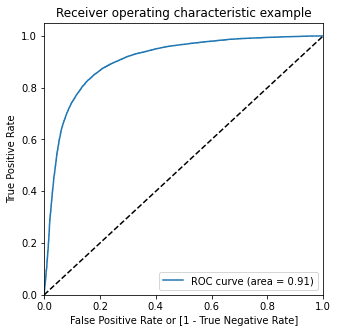

In [107]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

In [108]:
# create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.0,0.561636,1,1,1,1,1,1,1,0,0,0,0
1,0.0,0.061040,0,1,0,0,0,0,0,0,0,0,0
2,0.0,0.194825,0,1,1,0,0,0,0,0,0,0,0
3,0.0,0.000844,0,1,0,0,0,0,0,0,0,0,0
4,0.0,0.115130,0,1,1,0,0,0,0,0,0,0,0


In [109]:
# calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.703195  0.976591  0.429800
0.2   0.2  0.768579  0.953700  0.583458
0.3   0.3  0.804884  0.927236  0.682531
0.4   0.4  0.825677  0.893573  0.757781
0.5   0.5  0.835802  0.851365  0.820239
0.6   0.6  0.832306  0.796934  0.867678
0.7   0.7  0.817313  0.725879  0.908747
0.8   0.8  0.778471  0.614014  0.942928
0.9   0.9  0.649801  0.322906  0.976695


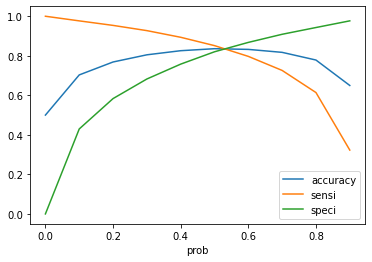

In [110]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [111]:
# final prediction based on the cutoff point

y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.49 else 0)

y_train_pred_final.head()

,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0.0,0.561636,1,1,1,1,1,1,1,0,0,0,0,1
1,0.0,0.061040,0,1,0,0,0,0,0,0,0,0,0,0
2,0.0,0.194825,0,1,1,0,0,0,0,0,0,0,0,0
3,0.0,0.000844,0,1,0,0,0,0,0,0,0,0,0,0
4,0.0,0.115130,0,1,1,0,0,0,0,0,0,0,0,0


In [112]:
# overall accuracy.

metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

0.8348956445181004

In [113]:
# confusion matrix

confusion2 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted )
confusion2

array([[15726,  3583],
       [ 2793, 16516]], dtype=int64)

In [114]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [115]:
# sensitivity of our logistic regression model

TP / float(TP+FN)

0.8553524263296908

In [116]:
# calculate specificity

TN / float(TN+FP)

0.8144388627065099

In [117]:
# Calculate false postive rate - predicting churn when customer does not have churned

print(FP/ float(TN+FP))

0.18556113729349008


In [118]:
# Positive predictive value 

print (TP / float(TP+FP))

0.8217324244987313


In [119]:
# Negative predictive value

print (TN / float(TN+ FN))

0.849181921270047


### Precision & Recall

In [120]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
confusion

array([[13179,  6130],
       [ 1405, 17904]], dtype=int64)

##### Precision
TP / TP + FP

In [121]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7449446617292169

##### Recall
TP / TP + FN

In [122]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.9272360039359884

In [123]:
from sklearn.metrics import precision_score, recall_score

print(precision_score(y_train_pred_final.Churn, y_train_pred_final.predicted))
print(recall_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.7449446617292169
0.9272360039359884


### Precision & recall tradeoff

In [124]:
from sklearn.metrics import precision_recall_curve

In [125]:
y_train_pred_final.Churn, y_train_pred_final.predicted

(0        0.0
 1        0.0
 2        0.0
 3        0.0
 4        0.0
         ... 
 38613    1.0
 38614    1.0
 38615    1.0
 38616    1.0
 38617    1.0
 Name: Churn, Length: 38618, dtype: float64,
 0        1
 1        0
 2        0
 3        0
 4        0
         ..
 38613    1
 38614    1
 38615    1
 38616    1
 38617    1
 Name: predicted, Length: 38618, dtype: int64)

In [126]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

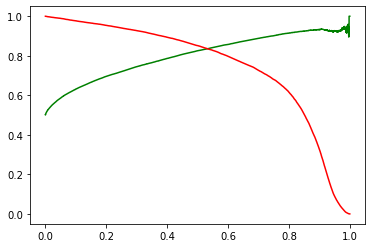

In [127]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making predictions on Test set

In [128]:
X_test_wthout_PCA = X_test[col]
X_test_wthout_PCA.head()

,arpu_6,arpu_7,onnet_mou_8,offnet_mou_7,offnet_mou_8,roam_og_mou_8,loc_og_mou_7,og_others_6,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_mou_8,spl_ic_mou_8,isd_ic_mou_6,total_rech_num_7,total_rech_num_8,last_day_rch_amt_8,vol_2g_mb_7,vol_2g_mb_8,night_pck_user_7,night_pck_user_8,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_8,monthly_3g_7,sachet_3g_7,aon,aug_vbc_3g,total_rech_data_amt_7
6102,-0.026722,-0.037483,-0.560372,-0.803671,-0.749456,-0.269277,-0.745518,-0.381423,-0.591946,-0.657288,-0.658097,-0.439104,-0.27395,-0.255537,-0.067496,-0.687704,0.521463,-0.433730,-0.400829,-1.121490,-1.043539,-0.411758,-0.384384,-0.447405,-0.441831,-0.385158,-0.274042,-0.675472,-0.451019,-0.489258
2539,-1.310659,-0.951329,-0.556607,-0.789045,-0.795516,-0.185776,-0.758322,-0.381423,-0.751984,-0.645456,-0.804736,-0.287681,-0.27395,-0.255537,0.626530,-0.334339,-0.817119,0.666095,0.313297,0.808629,0.877856,-0.411758,-0.384384,0.416757,0.425242,-0.385158,-0.274042,-0.300524,-0.451019,0.875973
21576,0.469410,0.473653,0.015664,0.989408,1.328443,-0.269277,1.906145,0.925612,0.877041,0.685666,0.725691,0.094822,-0.27395,-0.255537,-0.414508,-0.216550,0.391323,-0.433249,-0.400829,2.738747,-1.043539,-0.411758,-0.384384,-0.447405,-0.441831,1.395291,1.153062,-1.050421,-0.451019,-0.025018
19574,-0.252135,-0.178082,-0.284612,-0.222657,-0.258769,-0.269277,-0.097220,-0.381423,0.269259,0.134637,-0.142284,-0.413725,-0.27395,0.541648,1.320555,1.550274,-0.538248,-0.433730,-0.400829,-1.121490,-1.043539,-0.411758,-0.384384,-0.447405,-0.441831,-0.385158,-0.274042,0.074425,-0.451019,-0.489258
12804,0.156256,-0.411561,-0.459392,-0.555394,-0.791351,0.388007,-0.393207,-0.381423,0.249583,0.151806,-0.752522,-0.483305,-0.27395,0.752985,0.048175,-0.923280,-0.817119,0.034959,-0.400829,0.808629,-1.043539,1.855293,-0.384384,0.416757,-0.441831,-0.385158,-0.274042,0.449373,-0.398189,-0.332475


In [129]:
X_test_sm = sm.add_constant(X_test_wthout_PCA)

Making predictions on the test set

In [130]:
y_test_pred = logm5.predict(X_test_sm)

In [131]:
y_test_pred[:10]

6102     0.765712
2539     0.545040
21576    0.114190
19574    0.283105
12804    0.895378
24030    0.101032
20273    0.160458
7538     0.077330
3196     0.189125
12935    0.371939
dtype: float64

In [132]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [133]:
# Let's see the head
y_pred_1.head()

,0
6102,0.765712
2539,0.545040
21576,0.114190
19574,0.283105
12804,0.895378


In [134]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [135]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [136]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [137]:
y_pred_final.head()

,churn,0
0,1.0,0.765712
1,1.0,0.545040
2,0.0,0.114190
3,0.0,0.283105
4,1.0,0.895378


In [138]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})

In [139]:
# Let's see the head of y_pred_final
y_pred_final.head()

,churn,Churn_Prob
0,1.0,0.765712
1,1.0,0.545040
2,0.0,0.114190
3,0.0,0.283105
4,1.0,0.895378


In [140]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.56 else 0)

In [141]:
y_pred_final.head()

,churn,Churn_Prob,final_predicted
0,1.0,0.765712,1
1,1.0,0.545040,0
2,0.0,0.114190,0
3,0.0,0.283105,0
4,1.0,0.895378,1


In [142]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.churn, y_pred_final.final_predicted)

0.8534607265859349

In [143]:
confusion2 = metrics.confusion_matrix(y_pred_final.churn, y_pred_final.final_predicted )
confusion2

array([[7096, 1155],
       [ 164,  586]], dtype=int64)

In [144]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [145]:
# sensitivity of our logistic regression model
TP / float(TP+FN)

0.7813333333333333

In [146]:
# calculate specificity

TN / float(TN+FP)

0.860016967640286

### Hight Performance Model with PCA

In [147]:
X_train_res.shape

(38618, 95)

#### Applying PCA

In [148]:
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=100)

In [149]:
pca.fit(X_train_res)

PCA(random_state=100, svd_solver='randomized')

In [150]:
# pca components

pca.components_

array([[-1.41146339e-01, -1.27233365e-01, -4.93214515e-02, ...,
         1.41496604e-01,  1.08245241e-01,  1.18305911e-03],
       [ 1.58216706e-01,  2.18691211e-01,  2.53658869e-01, ...,
         7.41665858e-03,  4.07715701e-02,  4.82591633e-02],
       [-5.82415026e-02, -1.11334993e-01, -1.08741854e-01, ...,
        -3.82796851e-02, -4.46371330e-02, -4.43656327e-02],
       ...,
       [ 3.02019130e-03, -6.48833497e-04,  1.14916788e-03, ...,
         6.71814694e-05,  1.13276442e-03,  8.30430773e-04],
       [ 0.00000000e+00, -6.44645049e-16,  2.14641395e-16, ...,
         7.20416492e-16, -9.59977361e-16,  6.76719985e-16],
       [-0.00000000e+00, -1.27442550e-16,  5.18644324e-17, ...,
         1.54930504e-16,  9.59195970e-17, -7.63546522e-17]])

In [151]:
# explained variance ratio

pca.explained_variance_ratio_

array([1.23972932e-01, 8.80892552e-02, 7.03354760e-02, 5.54036362e-02,
       3.96648202e-02, 3.93014455e-02, 3.55436342e-02, 2.98217226e-02,
       2.64197941e-02, 2.56746581e-02, 2.44683695e-02, 2.22074043e-02,
       1.92494420e-02, 1.82975237e-02, 1.75264443e-02, 1.69081241e-02,
       1.62762998e-02, 1.46467245e-02, 1.32770291e-02, 1.25421436e-02,
       1.17009897e-02, 1.12792168e-02, 1.05816047e-02, 1.04198895e-02,
       1.02208913e-02, 9.53649441e-03, 9.06713806e-03, 8.90073438e-03,
       8.53678586e-03, 8.30966915e-03, 8.09544892e-03, 7.57916982e-03,
       7.18562782e-03, 6.95463258e-03, 6.70683202e-03, 6.62711291e-03,
       6.44385388e-03, 6.23596086e-03, 5.75656242e-03, 5.58319491e-03,
       5.41484422e-03, 5.18240081e-03, 5.09380751e-03, 4.93166335e-03,
       4.83704823e-03, 4.69571858e-03, 4.54799563e-03, 4.41240369e-03,
       4.21995804e-03, 3.99408289e-03, 3.93044419e-03, 3.87665364e-03,
       3.46925381e-03, 3.40200625e-03, 3.32855313e-03, 3.22289743e-03,
      

#### Scree Plot for the variance

In [152]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

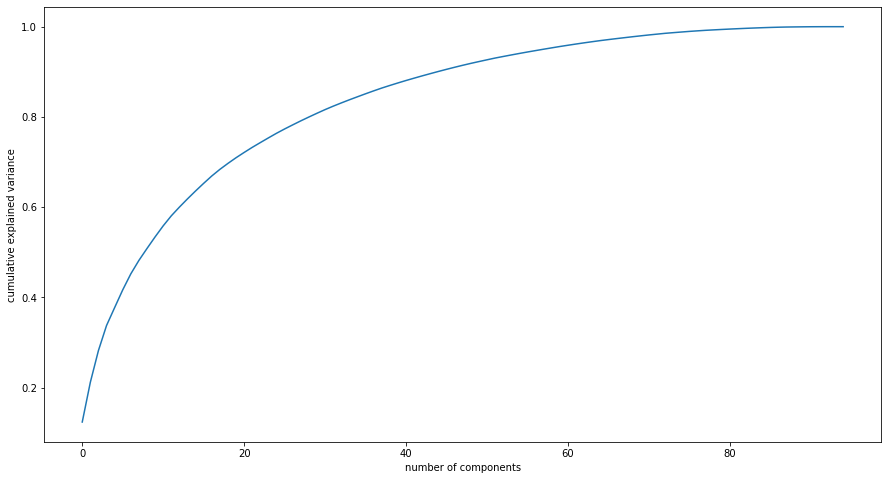

In [153]:
%matplotlib inline
fig = plt.figure(figsize = (15,8))
plt.plot(var_cumu)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

- perform pca using 35 components

In [154]:
from sklearn.decomposition import IncrementalPCA

In [155]:
pca_final = IncrementalPCA(n_components=35)
df_train_pca = pca_final.fit_transform(X_train_res)

In [156]:
df_train_pca.shape

(38618, 35)

In [157]:
corrmat = np.corrcoef(df_train_pca.transpose())

In [158]:
corrmat.shape

(35, 35)

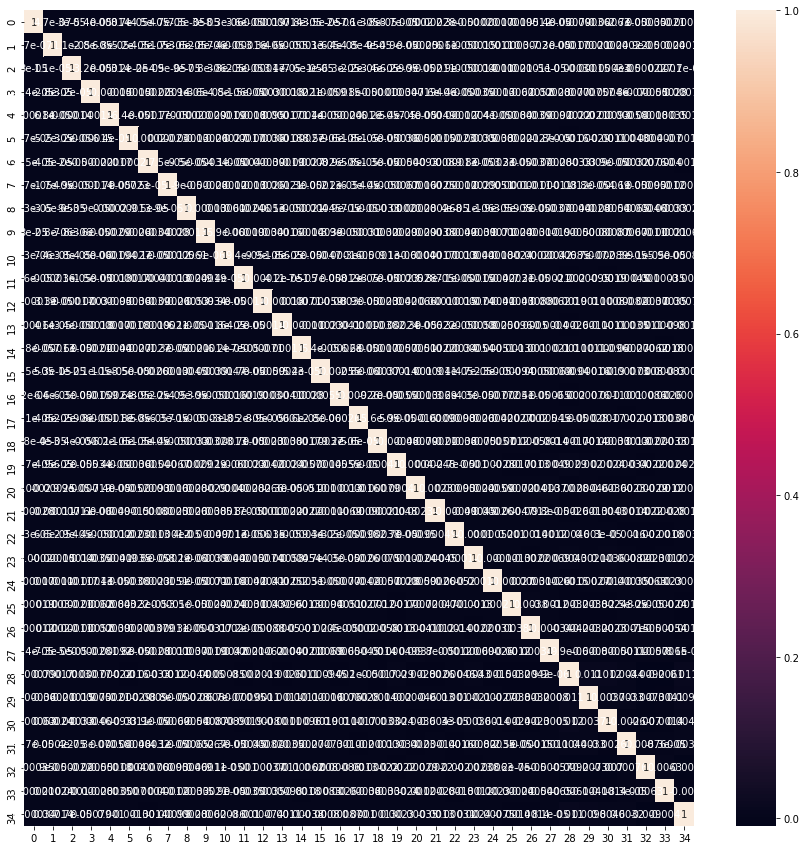

In [159]:
plt.figure(figsize=[15,15])
sns.heatmap(corrmat, annot=True)

Applying transformation on the test set

In [160]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(9001, 35)

### Applying logistic regression on the data on our Principal components

In [161]:
logreg_pca = LogisticRegression(class_weight='balanced')
model_pca = logreg_pca.fit(df_train_pca, y_train_res)

#### Making predictions on the test set

In [162]:
pred_probs_test = model_pca.predict_proba(df_test_pca)

In [163]:
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))

'0.87'

In [164]:
#Making prediction on the test data

pred_test = model_pca.predict_proba(df_test_pca)
y_pred_default = model_pca.predict(df_test_pca)

In [165]:
# confusion matrix & accuracy score

print(confusion_matrix(y_test,y_pred_default))
print(metrics.accuracy_score(y_test,y_pred_default))


[[6819 1432]
 [ 149  601]]
0.8243528496833685


In [166]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(pred_test)

# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test,y_pred_1],axis=1)

# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'churn_prob'})

In [167]:
# roc_auc score

from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds =roc_curve(y_pred_final.churn,y_pred_final.churn_prob)
roc_auc = auc(fpr, tpr)
print('ROC_AUC score: ',roc_auc)

ROC_AUC score:  0.8744410778491496


##### ROC  curve

In [168]:
#ROC Curve

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

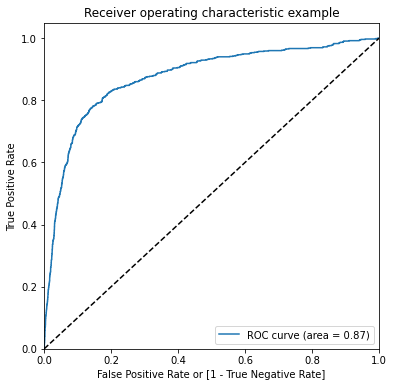

(array([0.        , 0.        , 0.        , ..., 0.99975761, 0.9998788 ,
        1.        ]),
 array([0.        , 0.00133333, 0.00266667, ..., 1.        , 1.        ,
        1.        ]),
 array([1.99801836e+00, 9.98018365e-01, 9.98014641e-01, ...,
        7.10155853e-05, 4.12796644e-05, 3.75090060e-05]))

In [169]:
draw_roc(y_pred_final.churn, y_pred_final.churn_prob)

In [170]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.churn_prob.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

,churn,churn_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1.0,0.690549,1,1,1,1,1,1,1,0,0,0
1,1.0,0.347347,1,1,1,1,0,0,0,0,0,0
2,0.0,0.264699,1,1,1,0,0,0,0,0,0,0
3,0.0,0.282715,1,1,1,0,0,0,0,0,0,0
4,1.0,0.673204,1,1,1,1,1,1,1,0,0,0


- Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

In [171]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final.churn, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.083324  0.000000  1.000000
0.1   0.1  0.429508  0.382014  0.952000
0.2   0.2  0.587712  0.557387  0.921333
0.3   0.3  0.688812  0.671434  0.880000
0.4   0.4  0.769137  0.762453  0.842667
0.5   0.5  0.824353  0.826445  0.801333
0.6   0.6  0.863793  0.873833  0.753333
0.7   0.7  0.893345  0.912495  0.682667
0.8   0.8  0.910788  0.943401  0.552000
0.9   0.9  0.921675  0.974912  0.336000


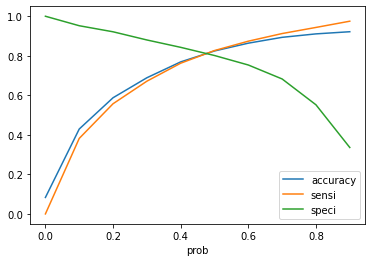

In [172]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

- Creating new column 'predicted_status' with 1 if Churn_Prob>0.49 else 0

In [173]:
# Creating new column 'predicted_status' with 1 if Churn_Prob>0.49 else 0

y_pred_final['predicted_status'] = y_pred_final.churn_prob.map( lambda x: 1 if x > 0.54 else 0)

y_pred_final.churn.value_counts()

0.0    8251
1.0     750
Name: churn, dtype: int64

In [174]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.churn, y_pred_final.predicted_status)
confusion

array([[6976, 1275],
       [ 161,  589]], dtype=int64)

In [175]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print('Accuracy Score on test data: ', metrics.accuracy_score(y_test,y_pred_default))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Accuracy Score on test data:  0.8243528496833685
Sensitivity:  0.7853333333333333
Specificity:  0.8454732759665495
false postive rate:  0.1545267240334505
positive predictive value:  0.3159871244635193
Negative predictive value:  0.977441502031666
Misclassification Rate:  0.15953782913009665


### Decision Tree classifier with PCA

In [176]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5, class_weight='balanced')
dt_default.fit(df_train_pca,y_train_res)

DecisionTreeClassifier(class_weight='balanced', max_depth=5)

In [177]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions on test dataset
y_pred_default = dt_default.predict(df_test_pca)

# # Printing classification report
# print(classification_report(y_test, y_pred_default))

# from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
print(classification_report(y_test,y_pred_default))
print(confusion_matrix(y_test,y_pred_default))
print('Acuracy Score', accuracy_score(y_test,y_pred_default))

              precision    recall  f1-score   support

         0.0       0.97      0.75      0.85      8251
         1.0       0.21      0.71      0.32       750

    accuracy                           0.75      9001
   macro avg       0.59      0.73      0.58      9001
weighted avg       0.90      0.75      0.80      9001

[[6207 2044]
 [ 220  530]]
Acuracy Score 0.7484723919564493


In [178]:
confusion_tree = confusion_matrix(y_test,y_pred_default)
TP = confusion_tree[1,1] # true positive 
TN = confusion_tree[0,0] # true negatives
FP = confusion_tree[0,1] # false positives
FN = confusion_tree[1,0] # false negatives

print('Acuracy Score', accuracy_score(y_test,y_pred_default))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Acuracy Score 0.7484723919564493
Sensitivity:  0.7066666666666667
Specificity:  0.7522724518240214
false postive rate:  0.24772754817597867
positive predictive value:  0.20590520590520592
Negative predictive value:  0.9657694103002956
Misclassification Rate:  0.25152760804355073


#### Hyper-parameter tuning

In [179]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 4

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", class_weight='balanced', random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                   return_train_score=True,
                    n_jobs=-1,
                   verbose=True)
tree.fit(df_train_pca,y_train_res)

Fitting 4 folds for each of 39 candidates, totalling 156 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done 156 out of 156 | elapsed:  1.2min finished


GridSearchCV(cv=4,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=100),
             n_jobs=-1, param_grid={'max_depth': range(1, 40)},
             return_train_score=True, scoring='accuracy', verbose=True)

In [180]:
y_train_res.shape

(38618,)

In [181]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.313761,0.000000,0.007812,7.812142e-03,1,{'max_depth': 1},0.659865,0.662662,0.660037,0.651958,0.658631,0.004009,39,0.659324,0.658599,0.659508,0.662167,0.659900,0.001352
1,0.711277,0.044984,0.009469,4.315050e-03,2,{'max_depth': 2},0.697462,0.726049,0.723120,0.713279,0.714978,0.011164,38,0.710769,0.717122,0.717753,0.721724,0.716842,0.003925
2,1.280962,0.141984,0.014451,1.239865e-02,3,{'max_depth': 3},0.721388,0.733713,0.733478,0.720427,0.727252,0.006354,37,0.735145,0.727963,0.728560,0.731701,0.730842,0.002861
3,1.445662,0.223901,0.005979,8.323336e-07,4,{'max_depth': 4},0.737545,0.761471,0.757821,0.748394,0.751308,0.009268,36,0.755550,0.756655,0.756974,0.756871,0.756513,0.000567
4,1.669912,0.028753,0.006229,4.311260e-04,5,{'max_depth': 5},0.757846,0.771517,0.774808,0.763828,0.767000,0.006619,35,0.775921,0.774954,0.772960,0.775238,0.774768,0.001102


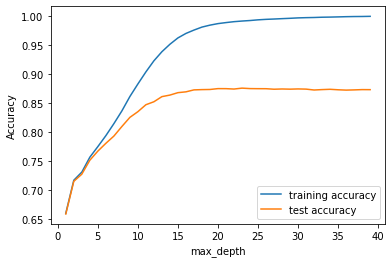

In [182]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores['mean_train_score'], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# seems 15 or 20 Max dept

In [183]:
## Lets tune min sample leaf
# parameters to build the model on
parameters = {'min_samples_leaf': range(5,200,25)}
#200, 20
# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini",class_weight='balanced',random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                   return_train_score=True,
                   n_jobs=-1,verbose=True)
tree.fit(df_train_pca,y_train_res)

Fitting 4 folds for each of 8 candidates, totalling 32 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:   12.3s finished


GridSearchCV(cv=4,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=100),
             n_jobs=-1, param_grid={'min_samples_leaf': range(5, 200, 25)},
             return_train_score=True, scoring='accuracy', verbose=True)

In [184]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,4.180040,0.226543,0.008723,0.001299,5,{'min_samples_leaf': 5},0.857172,0.864526,0.857883,0.857261,0.859211,0.003081,1,0.953734,0.954252,0.952527,0.954910,0.953856,0.000873
1,3.133542,0.229339,0.007725,0.000828,30,{'min_samples_leaf': 30},0.818954,0.833454,0.834784,0.823079,0.827568,0.006728,2,0.870007,0.871629,0.868803,0.869562,0.870000,0.001034
2,2.837755,0.199699,0.007971,0.000002,55,{'min_samples_leaf': 55},0.804868,0.822683,0.819453,0.814481,0.815371,0.006731,3,0.844802,0.845803,0.842736,0.848087,0.845357,0.001926
3,2.938164,0.170706,0.007725,0.000827,80,{'min_samples_leaf': 80},0.790989,0.811186,0.805884,0.805884,0.803486,0.007533,4,0.829127,0.828643,0.826025,0.832413,0.829052,0.002271
4,2.478206,0.037162,0.008971,0.001576,105,{'min_samples_leaf': 105},0.784464,0.804247,0.798011,0.797183,0.795976,0.007185,5,0.821980,0.818113,0.818602,0.820156,0.819713,0.001511


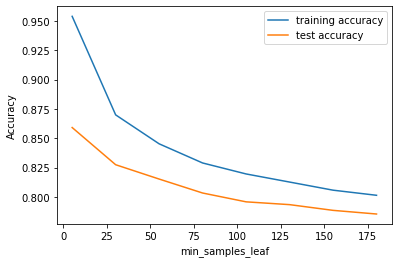

In [185]:
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#seems 5 to 150

In [186]:
## Tuning min sample split
# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 25)}
#,200, 20
# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini",class_weight='balanced', random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                   return_train_score=True,
                   n_jobs=-1, verbose=True)
tree.fit(df_train_pca,y_train_res)

Fitting 4 folds for each of 8 candidates, totalling 32 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:   15.8s finished


GridSearchCV(cv=4,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=100),
             n_jobs=-1, param_grid={'min_samples_split': range(5, 200, 25)},
             return_train_score=True, scoring='accuracy', verbose=True)

In [187]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,3.972700,0.197483,0.008472,0.000499,5,{'min_samples_split': 5},0.867840,0.873848,0.872488,0.867309,0.870371,0.002844,1,0.992957,0.992784,0.992542,0.992163,0.992611,0.000298
1,3.923115,0.207066,0.010216,0.002851,30,{'min_samples_split': 30},0.846712,0.858622,0.848353,0.852496,0.851546,0.004597,2,0.940441,0.939198,0.938441,0.943689,0.940442,0.002006
2,3.863010,0.026623,0.007970,0.000006,55,{'min_samples_split': 55},0.833454,0.845469,0.843588,0.837270,0.839945,0.004824,3,0.912923,0.913510,0.909094,0.915999,0.912882,0.002473
3,3.970648,0.062677,0.007725,0.000431,80,{'min_samples_split': 80},0.821025,0.842465,0.836959,0.828154,0.832151,0.008204,4,0.895073,0.895867,0.892660,0.896665,0.895066,0.001499
4,3.761675,0.051370,0.007475,0.000498,105,{'min_samples_split': 105},0.813775,0.833765,0.828051,0.828568,0.826040,0.007425,5,0.879916,0.879363,0.879747,0.886031,0.881264,0.002759


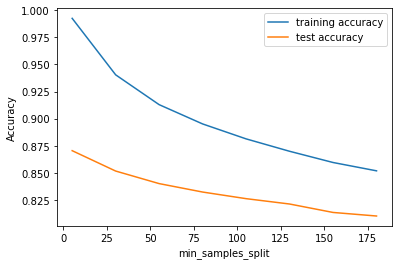

In [188]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#seems 25

In [189]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 35, 10),
    'min_samples_leaf': range(5, 200, 25),
    'min_samples_split': range(5, 200, 25),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier(class_weight='balanced')
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, refit='recall_score',
                          cv = n_folds, verbose = 1, n_jobs = -1)

# Fit the grid search to the data
grid_search.fit(df_train_pca,y_train_res)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done 1920 out of 1920 | elapsed: 12.1min finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 35, 10),
                         'min_samples_leaf': range(5, 200, 25),
                         'min_samples_split': range(5, 200, 25)},
             refit='recall_score', verbose=1)

In [190]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.503925,0.180961,0.005980,0.000632,entropy,5,5,5,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.749612,0.769291,0.769679,0.766024,0.761362,0.763193,0.007417,305
1,2.412588,0.157410,0.005783,0.000749,entropy,5,5,30,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.749612,0.768773,0.769679,0.766024,0.761362,0.763090,0.007334,306
2,2.479301,0.108924,0.005183,0.000399,entropy,5,5,55,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.749482,0.768773,0.769679,0.765506,0.761362,0.762960,0.007343,315
3,2.514584,0.090497,0.005581,0.000488,entropy,5,5,80,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.749482,0.768643,0.769420,0.765506,0.760715,0.762753,0.007307,317
4,2.689400,0.190163,0.006378,0.001738,entropy,5,5,105,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.749482,0.768125,0.769420,0.765506,0.760715,0.762650,0.007226,320


In [191]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.8663316304248483
DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=25, min_samples_leaf=5, min_samples_split=5)


In [192]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini",class_weight='balanced',
                                  random_state = 100,
                                  max_depth=25, 
                                  min_samples_leaf=5,
                                  min_samples_split=5)
clf_gini.fit(df_train_pca,y_train_res)

DecisionTreeClassifier(class_weight='balanced', max_depth=25,
                       min_samples_leaf=5, min_samples_split=5,
                       random_state=100)

In [193]:
# test data

y_pred_default = clf_gini.predict(df_test_pca)
confusion_tree_hyper=confusion_matrix(y_test,y_pred_default)
confusion_tree_hyper

array([[7084, 1167],
       [ 360,  390]], dtype=int64)

In [194]:
TP = confusion_tree_hyper[1,1] # true positive 
TN = confusion_tree_hyper[0,0] # true negatives
FP = confusion_tree_hyper[0,1] # false positives
FN = confusion_tree_hyper[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Sensitivity:  0.52
Specificity:  0.8585625984729124
false postive rate:  0.14143740152708761
positive predictive value:  0.2504816955684008
Negative predictive value:  0.9516389038151531
Misclassification Rate:  0.1696478169092323


### RandomForestClassifier with PCA

In [195]:
# Random forest

# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier(class_weight='balanced')

# fit
rfc.fit(df_train_pca,y_train_res)

# Making predictions
y_pred_default = rfc.predict(df_test_pca)

In [196]:
# confusion matrix

confusion_rf=confusion_matrix(y_test,y_pred_default)
confusion_rf

array([[7801,  450],
       [ 383,  367]], dtype=int64)

In [197]:
TN = confusion_rf[0,0] # true positive 
TP = confusion_rf[1,1] # true negatives
FP = confusion_rf[0,1] # false positives
FN = confusion_rf[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))


Sensitivity:  0.48933333333333334
Specificity:  0.945461156223488
false postive rate:  0.054538843776511935
positive predictive value:  0.44920440636474906
Negative predictive value:  0.9532013685239492
Misclassification Rate:  0.0925452727474725


#### Hyperparameter tuning for RandomForest

In [198]:
#Lets do some hyper parameter tuning 
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold CV
n_folds = 5
# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf_with_pca = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf_with_pca = GridSearchCV(rf_with_pca, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True, verbose=True, n_jobs=-1)
rf_with_pca.fit(df_train_pca, y_train_res)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.3min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1, param_grid={'max_depth': range(2, 20, 5)},
             return_train_score=True, scoring='accuracy', verbose=True)

In [199]:
# scores of GridSearch CV
scores = rf_with_pca.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,8.204210,0.567894,0.145845,0.016141,2,{'max_depth': 2},0.753237,0.764371,0.770197,0.753464,0.759938,0.760241,0.006500,4,0.761119,0.761119,0.766686,0.755818,0.773005,0.763549,0.005845
1,24.123755,0.845068,0.202396,0.017882,7,{'max_depth': 7},0.837131,0.843345,0.855256,0.843714,0.838016,0.843493,0.006464,3,0.860005,0.859973,0.858969,0.858586,0.860269,0.859560,0.000659
2,35.124196,1.760605,0.271061,0.030964,12,{'max_depth': 12},0.922450,0.917789,0.924262,0.920756,0.914411,0.919934,0.003488,2,0.958374,0.959442,0.959766,0.959637,0.959379,0.959319,0.000493
3,33.627513,3.103037,0.244799,0.011776,17,{'max_depth': 17},0.947307,0.940704,0.949120,0.942898,0.942768,0.944559,0.003136,1,0.985628,0.986664,0.985305,0.985985,0.986373,0.985991,0.000490


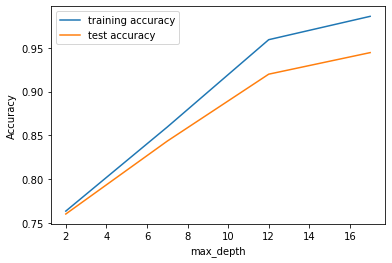

In [200]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#seems 10 to 12

In [201]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=10, class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True, n_jobs=-1, verbose=True)
rf.fit(df_train_pca, y_train_res)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  9.4min finished


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              max_depth=10),
             n_jobs=-1, param_grid={'n_estimators': range(100, 1500, 400)},
             return_train_score=True, scoring='accuracy', verbose=True)

In [202]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,28.087326,1.766179,0.295853,0.070305,100,{'n_estimators': 100},0.893190,0.891636,0.901735,0.895895,0.890328,0.894557,0.004040,4,0.927656,0.928077,0.926879,0.927626,0.929438,0.927935,0.000845
1,135.144520,1.780063,1.128881,0.054776,500,{'n_estimators': 500},0.894096,0.894226,0.902382,0.896154,0.889551,0.895282,0.004160,2,0.928983,0.929469,0.928271,0.927852,0.928791,0.928673,0.000562
2,245.567422,2.477086,2.022310,0.047789,900,{'n_estimators': 900},0.894614,0.894226,0.902382,0.894212,0.890846,0.895256,0.003816,3,0.929048,0.930375,0.929566,0.928370,0.928467,0.929165,0.000742
3,304.306376,26.681890,2.107427,0.322607,1300,{'n_estimators': 1300},0.893967,0.896297,0.902123,0.893824,0.891493,0.895541,0.003625,1,0.929145,0.929986,0.928659,0.928985,0.929115,0.929178,0.000439


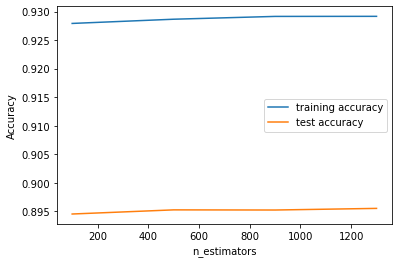

In [203]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [204]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf = RandomForestClassifier(max_depth=10,class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True, n_jobs=-1, verbose=True)
rf.fit(df_train_pca, y_train_res)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  3.8min finished


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              max_depth=10),
             n_jobs=-1, param_grid={'max_features': [4, 8, 14, 20, 24]},
             return_train_score=True, scoring='accuracy', verbose=True)

In [205]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,21.116782,1.439403,0.221658,0.015318,4,{'max_features': 4},0.890471,0.890212,0.900829,0.893694,0.888644,0.892770,0.004351,5,0.925034,0.925422,0.924387,0.925749,0.926784,0.925475,0.000796
1,38.656034,1.717798,0.218468,0.006563,8,{'max_features': 8},0.897462,0.896945,0.903418,0.896025,0.894989,0.897768,0.002948,3,0.930666,0.933450,0.930990,0.931219,0.932352,0.931735,0.001028
2,64.483550,1.313281,0.230031,0.023639,14,{'max_features': 14},0.902382,0.897721,0.905230,0.897967,0.894083,0.899477,0.003899,1,0.934356,0.937658,0.935004,0.936009,0.934811,0.935568,0.001177
3,89.976658,2.043871,0.215448,0.007773,20,{'max_features': 20},0.904713,0.898628,0.902382,0.895766,0.895636,0.899425,0.003608,2,0.936234,0.937140,0.933061,0.934811,0.935070,0.935263,0.001382
4,94.593878,9.020911,0.144123,0.030093,24,{'max_features': 24},0.900052,0.897333,0.901994,0.895636,0.892399,0.897483,0.003353,4,0.933612,0.934550,0.933871,0.934067,0.930830,0.933386,0.001314


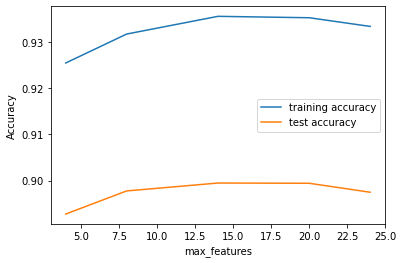

In [206]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# 8 to 10

In [207]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True, n_jobs=-1, verbose=True)
rf.fit(df_train_pca, y_train_res)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.6min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1, param_grid={'min_samples_leaf': range(100, 400, 50)},
             return_train_score=True, scoring='accuracy', verbose=True)

In [208]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,28.559425,4.500092,0.222054,0.015467,100,{'min_samples_leaf': 100},0.839332,0.848654,0.849560,0.847210,0.835815,0.844114,0.005506,1,0.862692,0.859908,0.858128,0.860463,0.857647,0.859767,0.001802
1,27.168247,2.924618,0.233619,0.039692,150,{'min_samples_leaf': 150},0.825867,0.840238,0.839591,0.838016,0.829082,0.834559,0.005917,2,0.846605,0.847446,0.846378,0.848325,0.847354,0.847221,0.000690
2,24.613197,1.338857,0.214881,0.023046,200,{'min_samples_leaf': 200},0.821077,0.831823,0.830658,0.829988,0.821054,0.826920,0.004816,3,0.840293,0.837056,0.833495,0.839586,0.838259,0.837738,0.002395
3,24.950650,2.274494,0.284050,0.083691,250,{'min_samples_leaf': 250},0.814992,0.826385,0.831434,0.829082,0.817169,0.823813,0.006548,4,0.832654,0.831262,0.830388,0.833760,0.831591,0.831931,0.001167
4,22.213447,1.775447,0.176808,0.026584,300,{'min_samples_leaf': 300},0.814086,0.822760,0.822631,0.819630,0.810048,0.817831,0.005003,5,0.828964,0.827377,0.824626,0.825635,0.824567,0.826234,0.001702


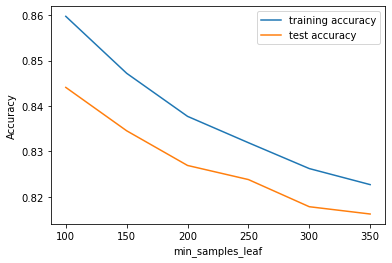

In [209]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#seems 100 to 150

In [210]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True, n_jobs=-1, verbose=True)
rf.fit(df_train_pca, y_train_res)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.1min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1, param_grid={'min_samples_split': range(200, 500, 50)},
             return_train_score=True, scoring='accuracy', verbose=True)

In [211]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,37.252845,4.236365,0.298401,0.063605,200,{'min_samples_split': 200},0.851631,0.866390,0.869368,0.868574,0.857050,0.862603,0.007028,1,0.889623,0.889623,0.886839,0.890047,0.888331,0.888892,0.001177
1,35.375950,3.194293,0.276943,0.062282,250,{'min_samples_split': 250},0.844381,0.860306,0.861989,0.859640,0.851353,0.855534,0.006681,2,0.879135,0.876190,0.876319,0.879527,0.877262,0.877687,0.001398
2,33.055274,2.890529,0.221657,0.010667,300,{'min_samples_split': 300},0.837649,0.855386,0.858234,0.854849,0.841642,0.849552,0.008267,3,0.872532,0.871917,0.869263,0.869785,0.869785,0.870656,0.001309
3,28.423607,1.865884,0.237805,0.042904,350,{'min_samples_split': 350},0.834930,0.853185,0.853314,0.849411,0.837887,0.845745,0.007808,4,0.863307,0.864925,0.860102,0.865253,0.863214,0.863360,0.001826
4,26.584343,0.807487,0.200433,0.010482,400,{'min_samples_split': 400},0.829622,0.845158,0.851890,0.846562,0.836074,0.841861,0.007960,5,0.858549,0.857675,0.857836,0.857744,0.858553,0.858071,0.000395


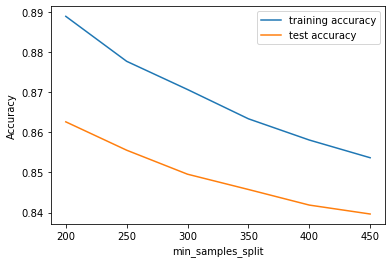

In [212]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# 200 to 300

In [213]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [8,10],
    'min_samples_leaf': range(100, 200, 100),
    'min_samples_split': range(200, 400, 100),
    'n_estimators': range(200, 400, 100), 
    'max_features': [8, 10, 12]
}
# Create a based model
rf = RandomForestClassifier(class_weight='balanced')

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,refit='recall_score' ,
                          cv = 5, n_jobs=-1, verbose = 1)

In [214]:
# Fit the grid search to the data
grid_search.fit(df_train_pca, y_train_res)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 28.3min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'max_depth': [8, 10], 'max_features': [8, 10, 12],
                         'min_samples_leaf': range(100, 200, 100),
                         'min_samples_split': range(200, 400, 100),
                         'n_estimators': range(200, 400, 100)},
             refit='recall_score', verbose=1)

In [229]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8430782493232634 using {'max_depth': 10, 'max_features': 8, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 200}


In [230]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True, class_weight='balanced',
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=200)

In [231]:
# fit
rfc.fit(df_train_pca,y_train_res)

RandomForestClassifier(class_weight='balanced', max_depth=10, max_features=10,
                       min_samples_leaf=100, min_samples_split=200,
                       n_estimators=200)

In [232]:
# predict
y_pred_default = rfc.predict(df_test_pca)

In [233]:
print(classification_report(y_test,y_pred_default))
print(confusion_matrix(y_test,y_pred_default))
print('accuracy_score:  ',accuracy_score(y_test,y_pred_default))

              precision    recall  f1-score   support

         0.0       0.97      0.86      0.91      8251
         1.0       0.32      0.73      0.45       750

    accuracy                           0.85      9001
   macro avg       0.65      0.79      0.68      9001
weighted avg       0.92      0.85      0.87      9001

[[7104 1147]
 [ 204  546]]
accuracy_score:   0.8499055660482169


In [234]:
# Confusion Matrix
confusion_rf_hyper=confusion_matrix(y_test,y_pred_default)
confusion_rf_hyper

array([[7104, 1147],
       [ 204,  546]], dtype=int64)

In [235]:
TN = confusion_rf_hyper[0,0] # true positive 
TP = confusion_rf_hyper[1,1] # true negatives
FP = confusion_rf_hyper[0,1] # false positives
FN = confusion_rf_hyper[1,0] # false negatives

print('Accuracy Score:  ',accuracy_score(y_test,y_pred_default))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Accuracy Score:   0.8499055660482169
Sensitivity:  0.728
Specificity:  0.8609865470852018
false postive rate:  0.13901345291479822
positive predictive value:  0.3225044300059067
Negative predictive value:  0.9720853858784894
Misclassification Rate:  0.15009443395178312


### RandomForest model with All feature

In [236]:
#Important Variables
from collections import OrderedDict
feature_names=list(X_train_res.columns.values)
important_features_dict = {}
for name, importance in zip(feature_names, rfc.feature_importances_):
    important_features_dict[name]=importance


#Sorting Dictionary in descending order of the importance variable
d_descending = OrderedDict(sorted(important_features_dict.items(), 
                                  key=lambda kv: kv[1], reverse=True))

In [237]:
#Variable Importance top 30 variable
dic= dict(d_descending)

from itertools import islice

def take(n, iterable):
    "Return first n items of the iterable as a list"
    return list(islice(iterable, n))

n=12
n_items = take(n, dic.items())

In [238]:
n_items

[('arpu_7', 0.17690971218632076),
 ('arpu_8', 0.14864998942256644),
 ('arpu_6', 0.11280975234448269),
 ('offnet_mou_7', 0.10451511168515999),
 ('offnet_mou_6', 0.0519917623631384),
 ('loc_og_t2c_mou_7', 0.045022055586667296),
 ('onnet_mou_8', 0.044573795450526345),
 ('roam_og_mou_7', 0.04239365220231397),
 ('onnet_mou_6', 0.032280245666782656),
 ('roam_og_mou_8', 0.025562899499468928),
 ('roam_og_mou_6', 0.022852442538678446),
 ('loc_og_t2c_mou_6', 0.01894560576965475)]

In [239]:
print('These are top 12 driver variable: ',n_items)

These are top 12 driver variable:  [('arpu_7', 0.17690971218632076), ('arpu_8', 0.14864998942256644), ('arpu_6', 0.11280975234448269), ('offnet_mou_7', 0.10451511168515999), ('offnet_mou_6', 0.0519917623631384), ('loc_og_t2c_mou_7', 0.045022055586667296), ('onnet_mou_8', 0.044573795450526345), ('roam_og_mou_7', 0.04239365220231397), ('onnet_mou_6', 0.032280245666782656), ('roam_og_mou_8', 0.025562899499468928), ('roam_og_mou_6', 0.022852442538678446), ('loc_og_t2c_mou_6', 0.01894560576965475)]


### Recommendations for the Telecom Company

#### Recommended variables are as follows

   - arpu_7
   - arpu_8
   - arpu_6
   - offnet_mou_7
   - onnet_mou_8
   - offnet_mou_6
   - loc_og_t2c_mou_7
   - roam_og_mou_7
   - onnet_mou_6
   - roam_og_mou_8
   - roam_og_mou_6
   - loc_og_t2c_mou_6

- From the above variables it clearly understood that 
- company should focus on the local outgoing call, calls on the within the network i.e it should have good the network coverage so as to avoid the people switching off the service.
- Company should focus on expanding the network in the different parts of the country so as to earn more from the roaming.
- Company can also focus on the calls which are going to other network as it may be chargeable while calling from one network to other network.

#### Observations from the first hand analysis of the data i.e initial data analysis
- There is drop in the total recharge amount for churned customers in 8th month which can be understood as the action initiated by the customers from its side.
- The same pattern is also observed for the data recharge as well.
- There is also drop in average revenue per user i.e Arpu in 8th month for customers getting churned.
- Focus on the customer whoes Avg max recharge amount has been decreased and may be possible they are thinking to switch the network operator.
- There is drop in internet data usage for 2G & 3G speed internet.
- There might be some areas where 2G/3G speed internet may not working as expected by the customers, therefore company needs to do a quick action plan/survey to avoid customers getting switch to different network operator.
    - 

##### Some Important features obtained from the Logistic regression without pca are as follows -
loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_6,total_rech_num_8,offnet_mou_7,offnet_mou_8,arpu_7,total_rech_num_7,
night_pck_user_8,night_pck_user_7,total_rech_data_amt_7,sachet_2g_8,monthly_3g_7,vol_2g_mb_8,vol_2g_mb_7,
loc_og_mou_7,monthly_2g_7,monthly_2g_8,sachet_2g_6,arpu_6,sachet_3g_7,onnet_mou_8,aug_vbc_3g,
last_day_rch_amt_8,aon,roam_og_mou_8,std_ic_mou_8,og_others_6,spl_ic_mou_8,isd_ic_mou_6


- Above variable indicate towards the local incoming calls and customers availing the service for long periods should be carried away, they should be taken care time to time with good offers and plans customised for selected mobile numbers.
- 
